<a href="https://colab.research.google.com/github/Jeongeun-Kwak/2020-AI-Challenge/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_%EB%B0%8F_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석 기본 세팅

In [ ]:
import xlrd
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
# matplotlib 패키지 한글 깨짐 처리 시작
plt.rc('font', family = 'Malgun Gothic') # 윈도우, 구글콜랩
plt.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시 마이너스 폰트 깨짐 해결
import seaborn as sns
sns.set(style='white') 

# google colab에는 한글 폰트가 기본으로 깔려있지 않기 떄문에 한글 폰트를 추가로 설치해주어야 함.(최초 1회만)
!apt-get update -qq
!apt-get install fonts-nanum* -qq

#지역별 전처리



In [ ]:
df = pd.read_excel(r'/content/전기차 충전소 설치현황_20201201.xls')
print(df)

          전기차 충전소 설치현황 ( 20201201 현재 )  ...                                         Unnamed: 5
0     시도 : 전체(시도), 시군구 : 전체(시 / 군 / 구)  ...                                                NaN
1                                   시구  ...                                               지원차종
2                                   전체  ...  SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...
3                                   전체  ...  SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...
4                                   전체  ...  SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...
...                                ...  ...                                                ...
3570                                전체  ...  SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...
3571                                전체  ...  SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...
3572                                전체  ...  SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...
3573                                전체  ...  SM3 Z

In [ ]:
df.head()

,전기차 충전소 설치현황 ( 20201201 현재 ),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,"시도 : 전체(시도), 시군구 : 전체(시 / 군 / 구)",NaN,NaN,NaN,NaN,NaN
1,시구,설치장소,주소,급속충전기(대),완속충전기(대),지원차종
2,전체,가평지사,경기도 가평군 가평읍 가화로 169-11,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
3,전체,상면사무소,경기도 가평군 상면 연하리 171-1,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
4,전체,설악면사무소,경기도 가평군 설악면 신천리 156-1,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."


In [ ]:
# 원 소스의 열제목이 이상함으로 처리가 편하게 수정. 
df.rename({'전기차 충전소 설치현황 ( 20201201 현재 )':'시구'}, axis = 1, inplace = True)
df.rename({'Unnamed: 1':'설치장소'}, axis = 1, inplace = True)
df.rename({'Unnamed: 2':'주소'}, axis = 1, inplace = True)
df.rename({'Unnamed: 3':'급속충전기(대)'}, axis = 1, inplace = True)
df.rename({'Unnamed: 4':'완속충전기(대)'}, axis = 1, inplace = True)
df.rename({'Unnamed: 5':'지원차종'}, axis = 1, inplace = True)
df

,시구,설치장소,주소,급속충전기(대),완속충전기(대),지원차종
0,"시도 : 전체(시도), 시군구 : 전체(시 / 군 / 구)",NaN,NaN,NaN,NaN,NaN
1,시구,설치장소,주소,급속충전기(대),완속충전기(대),지원차종
2,전체,가평지사,경기도 가평군 가평읍 가화로 169-11,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
3,전체,상면사무소,경기도 가평군 상면 연하리 171-1,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
4,전체,설악면사무소,경기도 가평군 설악면 신천리 156-1,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
...,...,...,...,...,...,...
3570,전체,첫마을6단지,세종특별자치시 한솔동 974,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
3571,전체,첫마을7단지,세종특별자치시 한솔동 978,1,4,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
3572,전체,한뜰마을1단지,세종특별자치시 어진동 554,1,3,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
3573,전체,호려울마을8,세종특별자치시 보람동 보람동로 14,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."


In [ ]:
# 불필요한 행 제거.
df = df.drop([0,])
df = df.drop([1,])

In [ ]:
# 인덱스 초기화.
df.reset_index(drop = True, inplace = True)

In [ ]:
# 충전기 대수가 텍스트라서 형변환.
df['급속충전기(대)'] = df['급속충전기(대)'].astype(int)
df['완속충전기(대)'] = df['완속충전기(대)'].astype(int) 

In [ ]:
# df['주소']만 가지고 나눌 경우, 동구와 같이 타 지역에도 있는 명칭이 같이 검색됨.
# 중복을 최소화하기 위해 지역 콜론을 새로 지정.
df['지역'] = df['주소'].str.slice(start=0, stop=5)
df

,시구,설치장소,주소,급속충전기(대),완속충전기(대),지원차종,지역
0,전체,가평지사,경기도 가평군 가평읍 가화로 169-11,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",경기도 가
1,전체,상면사무소,경기도 가평군 상면 연하리 171-1,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",경기도 가
2,전체,설악면사무소,경기도 가평군 설악면 신천리 156-1,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",경기도 가
3,전체,조종면사무소,경기도 가평군 조종면 현리 567-7,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",경기도 가
4,전체,LH강남힐스테이트,서울특별시 강남구 자곡동 자곡로3길 21,1,4,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",서울특별시
...,...,...,...,...,...,...,...
3568,전체,첫마을6단지,세종특별자치시 한솔동 974,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",세종특별자
3569,전체,첫마을7단지,세종특별자치시 한솔동 978,1,4,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",세종특별자
3570,전체,한뜰마을1단지,세종특별자치시 어진동 554,1,3,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",세종특별자
3571,전체,호려울마을8,세종특별자치시 보람동 보람동로 14,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",세종특별자


In [ ]:
# 지역 이름 확인용.
pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
-,30
강원 강릉,0
강원 동해,3
강원 양양,2
강원 원주,1
...,...
충북 괴산,1
충북 제천,1
충북 청주,1


In [ ]:
 # 새로은 df를 만들어 여기에 정보를 저장하는 방식으로 진행.
col = ['행정도시', '시도', '위치수', '급속', '완속']
ind = [1,2,3,4,5]

con = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0],[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
new = pd.DataFrame(con, columns = col, index = ind)

# 서울특별시

In [ ]:
# 지역 이름 확인용.
df_서울 = df['주소'].str.contains('서울')
set_서울 =  df[df_서울]

df['지역'] = set_서울['주소'].str.slice(start=0, stop=9)

pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
서울 강남구 논현,1
서울 강남구 대치,1
서울 강남구 삼성,1
서울 강남구 세곡,1
서울 강남구 역삼,2
...,...
서울특별시 은평구,6
서울특별시 종로구,9
서울특별시 중구,20


In [ ]:
# 서울 구 = [관악구, 강남구, 강동구, 강북구, 광진구, 송파구, 서초구, 금천구, 동작구, 용산구, 중구, 성동구, 동대문구, 중랑구, 성북구, 노원구, 도봉구, 종로구, 은평구, 서대문구, 마포구, 영등포구, 양천구, 구로구, 강서구] 

관악구 = df['주소'].str.contains('관악구', na = False)
subset_관악구 = df[관악구]

fast1 = subset_관악구['급속충전기(대)'].astype(int)
slow1 = subset_관악구['완속충전기(대)'].astype(int)

new.loc[1] = ['서울특별시', '관악구',len(df[관악구]), fast1.sum(), slow1.sum()]

강남구 =df['주소'].str.contains('강남구', na = False)
subset_강남구 = df[강남구]

fast2 = subset_강남구['급속충전기(대)'].astype(int)
slow2 = subset_강남구['완속충전기(대)'].astype(int)

new.loc[2] = ['서울특별시', '강남구',len(df[강남구]), fast2.sum(), slow2.sum()]

강동구 = df['주소'].str.contains('강동구', na = False)
subset_강동구 = df[강동구]

fast3 = subset_강동구['급속충전기(대)'].astype(int)
slow3 = subset_강동구['완속충전기(대)'].astype(int)

new.loc[3] = ['서울특별시', '강동구',len(df[강동구]), fast3.sum(), slow3.sum()]

강북구 = df['주소'].str.contains('강북구', na = False)
subset_강북구 = df[강북구]

fast4 = subset_강북구['급속충전기(대)'].astype(int)
slow4 = subset_강북구['완속충전기(대)'].astype(int)

new.loc[4] = ['서울특별시', '강북구',len(df[강북구]), fast4.sum(), slow4.sum()]

광진구 = df['주소'].str.contains('광진구', na = False)
subset_광진구 = df[광진구]

fast5 = subset_강북구['급속충전기(대)'].astype(int)
slow5 = subset_강북구['완속충전기(대)'].astype(int)

new.loc[5] = ['서울특별시', '광진구',len(df[광진구]), fast5.sum(), slow5.sum()]

송파구 = df['주소'].str.contains('송파구', na = False)
subset_송파구 = df[송파구]

fast6 = subset_송파구['급속충전기(대)'].astype(int)
slow6 = subset_송파구['완속충전기(대)'].astype(int)

new.loc[6] = ['서울특별시', '송파구',len(df[송파구]), fast6.sum(), slow6.sum()]

서초구 = df['주소'].str.contains('서초구', na = False)
subset_서초구 = df[서초구]

fast7 = subset_서초구['급속충전기(대)'].astype(int)
slow7 = subset_서초구['완속충전기(대)'].astype(int)

new.loc[7] = ['서울특별시', '서초구',len(df[서초구]), fast7.sum(), slow7.sum()]

금천구 = df['주소'].str.contains('금천구', na = False)
subset_금천구 = df[금천구]

fast8 = subset_금천구['급속충전기(대)'].astype(int)
slow8 = subset_금천구['완속충전기(대)'].astype(int)

new.loc[8] = ['서울특별시', '금천구',len(df[금천구]), fast8.sum(), slow8.sum()]

동작구 = df['주소'].str.contains('동작구', na = False)
subset_동작구 = df[동작구]

fast9 = subset_동작구['급속충전기(대)'].astype(int)
slow9 = subset_동작구['완속충전기(대)'].astype(int)

new.loc[9] = ['서울특별시', '동작구',len(df[동작구]), fast9.sum(), slow9.sum()]

용산구 = df['주소'].str.contains('용산구', na = False)
subset_용산구 = df[용산구]

fast10 = subset_용산구['급속충전기(대)'].astype(int)
slow10 = subset_용산구['완속충전기(대)'].astype(int)

new.loc[10] = ['서울특별시', '용산구',len(df[용산구]), fast10.sum(), slow10.sum()]

중구 = df['지역'].str.contains('중구', na = False)
subset_중구 = df[중구]

fast11 = subset_중구['급속충전기(대)'].astype(int)
slow11 = subset_중구['완속충전기(대)'].astype(int)

new.loc[11] = ['서울특별시', '중구',len(df[중구]), fast11.sum(), slow11.sum()]

성동구 = df['주소'].str.contains('성동구', na = False)
subset_성동구 = df[금천구]

fast12 = subset_성동구['급속충전기(대)'].astype(int)
slow12 = subset_성동구['완속충전기(대)'].astype(int)

new.loc[12] = ['서울특별시', '성동구',len(df[성동구]), fast12.sum(), slow12.sum()]

동대문구 = df['주소'].str.contains('동대문구', na = False)
subset_동대문구 = df[동대문구]

fast13 = subset_동대문구['급속충전기(대)'].astype(int)
slow13 = subset_동대문구['완속충전기(대)'].astype(int)

new.loc[13] = ['서울특별시', '동대문구',len(df[동대문구]), fast13.sum(), slow13.sum()]

중랑구 = df['주소'].str.contains('중랑구', na = False)
subset_중랑구 = df[중랑구]

fast14 = subset_중랑구['급속충전기(대)'].astype(int)
slow14 = subset_중랑구['완속충전기(대)'].astype(int)

new.loc[14] = ['서울특별시', '중랑구',len(df[중랑구]), fast14.sum(), slow14.sum()]

성북구 = df['주소'].str.contains('성북구', na = False)
subset_성북구 = df[성북구]

fast15 = subset_성북구['급속충전기(대)'].astype(int)
slow15 = subset_성북구['완속충전기(대)'].astype(int)

new.loc[15] = ['서울특별시', '성북구',len(df[성북구]), fast15.sum(), slow15.sum()]

노원구 = df['주소'].str.contains('노원구', na = False)
subset_노원구 = df[노원구]

fast16 = subset_노원구['급속충전기(대)'].astype(int)
slow16 = subset_노원구['완속충전기(대)'].astype(int)

new.loc[16] = ['서울특별시', '노원구',len(df[노원구]), fast16.sum(), slow16.sum()]

도봉구 = df['주소'].str.contains('도봉구', na = False)
subset_도봉구 = df[도봉구]

fast17 = subset_도봉구['급속충전기(대)'].astype(int)
slow17 = subset_도봉구['완속충전기(대)'].astype(int)

new.loc[17] = ['서울특별시', '도봉구',len(df[도봉구]), fast17.sum(), slow17.sum()]

종로구 = df['주소'].str.contains('종로구', na = False)
subset_종로구 = df[종로구]

fast18 = subset_종로구['급속충전기(대)'].astype(int)
slow18 = subset_종로구['완속충전기(대)'].astype(int)

new.loc[18] = ['서울특별시', '종로구',len(df[종로구]), fast18.sum(), slow18.sum()]

은평구 = df['주소'].str.contains('은평구', na = False)
subset_은평구 = df[은평구]

fast19 = subset_은평구['급속충전기(대)'].astype(int)
slow19 = subset_은평구['완속충전기(대)'].astype(int)

new.loc[19] = ['서울특별시', '은평구',len(df[은평구]), fast19.sum(), slow19.sum()]

서대문구 = df['주소'].str.contains('서대문구', na = False)
subset_서대문구 = df[서대문구]

fast20 = subset_서대문구['급속충전기(대)'].astype(int)
slow20 = subset_서대문구['완속충전기(대)'].astype(int)

new.loc[20] = ['서울특별시', '서대문구',len(df[서대문구]), fast20.sum(), slow20.sum()]

마포구 = df['주소'].str.contains('마포구', na = False)
subset_마포구 = df[마포구]

fast21 = subset_마포구['급속충전기(대)'].astype(int)
slow21 = subset_마포구['완속충전기(대)'].astype(int)

new.loc[21] = ['서울특별시', '마포구',len(df[마포구]), fast21.sum(), slow21.sum()]

영등포구 = df['주소'].str.contains('영등포구', na = False)
subset_영등포구 = df[영등포구]

fast22 = subset_영등포구['급속충전기(대)'].astype(int)
slow22 = subset_영등포구['완속충전기(대)'].astype(int)

new.loc[22] = ['서울특별시', '영등포구',len(df[영등포구]), fast22.sum(), slow22.sum()]

양천구 = df['주소'].str.contains('양천구', na = False)
subset_양천구 = df[양천구]

fast23 = subset_양천구['급속충전기(대)'].astype(int)
slow23 = subset_양천구['완속충전기(대)'].astype(int)

new.loc[23] = ['서울특별시', '양천구',len(df[양천구]), fast23.sum(), slow23.sum()]

구로구 = df['주소'].str.contains('구로구', na = False)
subset_구로구 = df[구로구]

fast24 = subset_구로구['급속충전기(대)'].astype(int)
slow24 = subset_구로구['완속충전기(대)'].astype(int)

new.loc[24] = ['서울특별시', '구로구',len(df[구로구]), fast24.sum(), slow24.sum()]

# 강서구는 부산에도 있기에 중복되는 이름들은 전국 지도 단위가 아닌 서울 지역 주소 내에서 검색.
강서구 = df['지역'].str.contains('강서구', na = False)
subset_강서구 = df[강서구]

fast25 = subset_강서구['급속충전기(대)'].astype(int)
slow25 = subset_강서구['완속충전기(대)'].astype(int)

new.loc[25] = ['서울특별시', '강서구',len(df[강서구]), fast25.sum(), slow25.sum()]

new

,행정도시,시도,위치수,급속,완속
1,서울특별시,관악구,13,9,14
2,서울특별시,강남구,53,37,81
3,서울특별시,강동구,32,26,56
4,서울특별시,강북구,8,8,16
5,서울특별시,광진구,12,8,16
6,서울특별시,송파구,46,44,89
7,서울특별시,서초구,44,22,83
8,서울특별시,금천구,5,7,2
9,서울특별시,동작구,16,12,26
10,서울특별시,용산구,21,18,33


In [ ]:
new['위치수'].sum()

559

In [ ]:
new['급속'].sum()

453

In [ ]:
new['완속'].sum()

922

In [ ]:
new['급속'].sum() + new['완속'].sum()

1375

# 인천광역시

In [ ]:
col = ['행정도시', '시도', '위치수', '급속', '완속']
ind = [1,2,3,4,5]

con = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0],[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
new1 = pd.DataFrame(con, columns = col, index = ind)

In [ ]:
df_인천 = df['주소'].str.contains('인천')
set_인천 =  df[df_인천]

df['지역'] = set_인천['주소'].str.slice(start=0, stop=10)

pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
인천 계양구 계산동,1
인천 부평구 부개동,1
인천 서구 검암동,1
인천 중구 신흥동1,0
인천 중구 항동7가,2
인천광역시 강화군,5
인천광역시 계양구,9
인천광역시 남동구,24
인천광역시 동구 금,1


In [ ]:
# 인천 구 = ['계양구', '부평구', '서구', '중구', '강화군', '남동구', '동구' , '미추홀구', '연수구'] 
#웅진군은 피벗테이블에 없어서 제외. 피벗 테이블에 없다는 것은 엑셀 파일 내에서도 없다는 것임.
# 서울에서 전국 주소 단위로 봤을 때, 부산과의 중복이 있었기에 이후에는 단위 지역별 주소로 검색.

계양구 = df['지역'].str.contains('계양구', na = False)
subset_계양구 = df[계양구]

인천_fast1 = subset_계양구['급속충전기(대)'].astype(int).sum()
인천_slow1 = subset_계양구['완속충전기(대)'].astype(int).sum()

new1.loc[1] = ['인천광역시', '계양구',len(df[계양구]), 인천_fast1, 인천_slow1]

부평구 = df['지역'].str.contains('부평구', na = False)
subset_부평구 = df[부평구]

인천_fast2 = subset_부평구['급속충전기(대)'].astype(int).sum()
인천_slow2 = subset_부평구['완속충전기(대)'].astype(int).sum()

new1.loc[2] = ['인천광역시', '부평구',len(df[부평구]), 인천_fast2, 인천_slow2]

서구 = df['지역'].str.contains('서구', na = False)
subset_서구 = df[서구]

인천_fast3 = subset_서구['급속충전기(대)'].astype(int).sum()
인천_slow3 = subset_서구['완속충전기(대)'].astype(int).sum()

new1.loc[3] = ['인천광역시', '서구',len(df[서구]), 인천_fast3, 인천_slow3]

중구 = df['지역'].str.contains('중구', na = False)
subset_중구 = df[중구]

인천_fast4 = subset_중구['급속충전기(대)'].astype(int).sum()
인천_slow4 = subset_중구['완속충전기(대)'].astype(int).sum()

new1.loc[4] = ['인천광역시', '중구',len(df[중구]), 인천_fast4, 인천_slow4]

강화군 = df['지역'].str.contains('강화군', na = False)
subset_강화군 = df[강화군]

인천_fast5 = subset_강화군['급속충전기(대)'].astype(int).sum()
인천_slow5 = subset_강화군['완속충전기(대)'].astype(int).sum()

new1.loc[5] = ['인천광역시', '강화군',len(df[강화군]), 인천_fast5, 인천_slow5]

남동구 = df['지역'].str.contains('남동구', na = False)
subset_남동구 = df[남동구]

인천_fast6 = subset_남동구['급속충전기(대)'].astype(int).sum()
인천_slow6 = subset_남동구['완속충전기(대)'].astype(int).sum()

new1.loc[6] = ['인천광역시', '남동구',len(df[남동구]), 인천_fast6, 인천_slow6]

# 동구를 검색하니 남동구 결과까지 같이 나와 따로 빼줌.
동구 = df['지역'].str.contains('동구', na = False)
subset_동구 = df[동구]

인천_fast7 = subset_동구['급속충전기(대)'].astype(int).sum()
인천_slow7 = subset_동구['완속충전기(대)'].astype(int).sum()

new1.loc[7] = ['인천광역시', '동구',len(df[동구])-len(df[남동구]), 인천_fast7-인천_fast6, 인천_slow7-인천_slow6]

미추홀구 = df['지역'].str.contains('미추홀구', na = False)
subset_미추홀구 = df[미추홀구]

인천_fast8 = subset_미추홀구['급속충전기(대)'].astype(int).sum()
인천_slow8 = subset_미추홀구['완속충전기(대)'].astype(int).sum()

new1.loc[8] = ['인천광역시', '미추홀구',len(df[미추홀구]), 인천_fast8, 인천_slow8]

연수구 = df['지역'].str.contains('연수구', na = False)
subset_연수구 = df[연수구]

인천_fast9 = subset_연수구['급속충전기(대)'].astype(int).sum()
인천_slow9 = subset_연수구['완속충전기(대)'].astype(int).sum()

new1.loc[9] = ['인천광역시', '연수구',len(df[연수구]), 인천_fast9, 인천_slow9]

new1

,행정도시,시도,위치수,급속,완속
1,인천광역시,계양구,8,10,4
2,인천광역시,부평구,13,13,24
3,인천광역시,서구,31,23,73
4,인천광역시,중구,14,14,37
5,인천광역시,강화군,5,5,0
6,인천광역시,남동구,24,24,54
7,인천광역시,동구,6,4,9
8,인천광역시,미추홀구,12,10,29
9,인천광역시,연수구,34,33,80


In [ ]:
new1['위치수'].sum()

147

In [ ]:
new1['급속'].sum()

136

In [ ]:
new1['완속'].sum()

310

In [ ]:
new1['급속'].sum() + new1['완속'].sum()

446

# 경기도

In [ ]:
col = ['행정도시', '시도', '위치수', '급속', '완속']
ind = [1,2,3,4,5]

con = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0],[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
new2 = pd.DataFrame(con, columns = col, index = ind)

In [ ]:
df_경기도 = df['주소'].str.contains('경기')
set_경기 =  df[df_경기도]

df['지역'] = set_경기['주소'].str.slice(start=0, stop=8)

pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
경기 고양시 일,1
경기 광주시 경,1
경기 광주시 송,0
경기 광주시 쌍,1
경기 광주시 역,1
경기 광주시 오,1
경기 광주시 장,2
경기 광주시 초,1
경기 구리시 교,0


In [ ]:
#경기도 구 = ['가평군', '고양시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시', '동두천시', '부천시'] 
#경기도 구 = ['성남시', '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시', '양평군', '여주시', '연천군']
#경기도 구 = ['오산시', '용인시', '의왕시', '의정부시', '이천시', '파주시', '평택시', '포천시', '하남시', '화성시']	
#과천시는 피벗테이블에 없음.

가평군 = df['지역'].str.contains('가평군', na = False)
subset_가평군 = df[가평군]

경기_fast1 = subset_가평군['급속충전기(대)'].astype(int).sum()
경기_slow1 = subset_가평군['완속충전기(대)'].astype(int).sum()

new2.loc[1] = ['경기도', '가평군',len(df[가평군]), 경기_fast1, 경기_slow1]

고양시 = df['지역'].str.contains('고양시', na = False)
subset_고양시 = df[고양시]

경기_fast2 = subset_고양시['급속충전기(대)'].astype(int).sum()
경기_slow2 = subset_고양시['완속충전기(대)'].astype(int).sum()

new2.loc[2] = ['경기도', '고양시',len(df[고양시]), 경기_fast2, 경기_slow2]

광명시 = df['지역'].str.contains('광명시', na = False)
subset_광명시 = df[광명시]

경기_fast3 = subset_광명시['급속충전기(대)'].astype(int).sum()
경기_slow3 = subset_광명시['완속충전기(대)'].astype(int).sum()

new2.loc[3] = ['경기도', '광명시',len(df[광명시]), 경기_fast3, 경기_slow3]

광주시 = df['지역'].str.contains('광주시', na = False)
subset_광주시 = df[광주시]

경기_fast4 = subset_광주시['급속충전기(대)'].astype(int).sum()
경기_slow4 = subset_광주시['완속충전기(대)'].astype(int).sum()

new2.loc[4] = ['경기도', '광주시',len(df[광주시]), 경기_fast4, 경기_slow4]

구리시 = df['지역'].str.contains('구리시', na = False)
subset_구리시 = df[구리시]

경기_fast5 = subset_구리시['급속충전기(대)'].astype(int).sum()
경기_slow5 = subset_구리시['완속충전기(대)'].astype(int).sum()

new2.loc[5] = ['경기도', '구리시',len(df[구리시]), 경기_fast5, 경기_slow5]

군포시 = df['지역'].str.contains('군포시', na = False)
subset_군포시 = df[군포시]

경기_fast6 = subset_군포시['급속충전기(대)'].astype(int).sum()
경기_slow6 = subset_군포시['완속충전기(대)'].astype(int).sum()

new2.loc[6] = ['경기도', '군포시',len(df[군포시]), 경기_fast6, 경기_slow6]

김포시 = df['지역'].str.contains('김포시', na = False)
subset_김포시 = df[김포시]

경기_fast7 = subset_김포시['급속충전기(대)'].astype(int).sum()
경기_slow7 = subset_김포시['완속충전기(대)'].astype(int).sum()

new2.loc[7] = ['경기도', '김포시',len(df[김포시]), 경기_fast7, 경기_slow7]

남양주시 = df['지역'].str.contains('남양주시', na = False)
subset_남양주시 = df[남양주시]

경기_fast8 = subset_남양주시['급속충전기(대)'].astype(int).sum()
경기_slow8 = subset_남양주시['완속충전기(대)'].astype(int).sum()

new2.loc[8] = ['경기도', '남양주시',len(df[남양주시]), 경기_fast8, 경기_slow8]

동두천시 = df['지역'].str.contains('동두천시', na = False)
subset_동두천시 = df[동두천시]

경기_fast9 = subset_동두천시['급속충전기(대)'].astype(int).sum()
경기_slow9 = subset_동두천시['완속충전기(대)'].astype(int).sum()

new2.loc[9] = ['경기도', '동두천시',len(df[동두천시]), 경기_fast9, 경기_slow9]

부천시 = df['지역'].str.contains('부천시', na = False)
subset_부천시 = df[부천시]

경기_fast10 = subset_부천시['급속충전기(대)'].astype(int).sum()
경기_slow10 = subset_부천시['완속충전기(대)'].astype(int).sum()

new2.loc[10] = ['경기도', '부천시',len(df[부천시]), 경기_fast10, 경기_slow10]

성남시 = df['지역'].str.contains('성남시', na = False)
subset_성남시 = df[성남시]

경기_fast11 = subset_성남시['급속충전기(대)'].astype(int).sum()
경기_slow11 = subset_성남시['완속충전기(대)'].astype(int).sum()

new2.loc[11] = ['경기도', '성남시',len(df[성남시]), 경기_fast11, 경기_slow11]

수원시 = df['지역'].str.contains('수원시', na = False)
subset_수원시 = df[수원시]

경기_fast12 = subset_수원시['급속충전기(대)'].astype(int).sum()
경기_slow12 = subset_수원시['완속충전기(대)'].astype(int).sum()

new2.loc[12] = ['경기도', '수원시',len(df[수원시]), 경기_fast12, 경기_slow12]

시흥시 = df['지역'].str.contains('시흥시', na = False)
subset_시흥시 = df[시흥시]

경기_fast13 = subset_시흥시['급속충전기(대)'].astype(int).sum()
경기_slow13 = subset_시흥시['완속충전기(대)'].astype(int).sum()

new2.loc[13] = ['경기도', '시흥시',len(df[시흥시]), 경기_fast13, 경기_slow13]

안산시 = df['지역'].str.contains('안산시', na = False)
subset_안산시 = df[안산시]

경기_fast14 = subset_안산시['급속충전기(대)'].astype(int).sum()
경기_slow14 = subset_안산시['완속충전기(대)'].astype(int).sum()

new2.loc[14] = ['경기도', '안산시',len(df[안산시]), 경기_fast14, 경기_slow14]

안성시 = df['지역'].str.contains('안성시', na = False)
subset_안성시 = df[안성시]

경기_fast15 = subset_안성시['급속충전기(대)'].astype(int).sum()
경기_slow15 = subset_안성시['완속충전기(대)'].astype(int).sum()

new2.loc[15] = ['경기도', '안성시',len(df[안성시]), 경기_fast15, 경기_slow15]

안양시 = df['지역'].str.contains('안양시', na = False)
subset_안양시 = df[안양시]

경기_fast16 = subset_안양시['급속충전기(대)'].astype(int).sum()
경기_slow16 = subset_안양시['완속충전기(대)'].astype(int).sum()

new2.loc[16] = ['경기도', '안양시',len(df[안양시]), 경기_fast16, 경기_slow16]

양주시 = df['지역'].str.contains('양주시', na = False)
subset_양주시 = df[양주시]

경기_fast17 = subset_양주시['급속충전기(대)'].astype(int).sum()
경기_slow17 = subset_양주시['완속충전기(대)'].astype(int).sum()

new2.loc[17] = ['경기도', '양주시',len(df[양주시]), 경기_fast17, 경기_slow17]

양평군 = df['지역'].str.contains('양평군', na = False)
subset_양평군 = df[양평군]

경기_fast18 = subset_양평군['급속충전기(대)'].astype(int).sum()
경기_slow18 = subset_양평군['완속충전기(대)'].astype(int).sum()

new2.loc[18] = ['경기도', '양평군',len(df[양평군]), 경기_fast18, 경기_slow18]

여주시 = df['지역'].str.contains('여주시', na = False)
subset_여주시 = df[여주시]

경기_fast19 = subset_여주시['급속충전기(대)'].astype(int).sum()
경기_slow19 = subset_여주시['완속충전기(대)'].astype(int).sum()

new2.loc[19] = ['경기도', '여주시',len(df[여주시]), 경기_fast19, 경기_slow19]

연천군 = df['지역'].str.contains('연천군', na = False)
subset_연천군 = df[연천군]

경기_fast20 = subset_연천군['급속충전기(대)'].astype(int).sum()
경기_slow20 = subset_연천군['완속충전기(대)'].astype(int).sum()

new2.loc[20] = ['경기도', '연천군',len(df[연천군]), 경기_fast20, 경기_slow20]

오산시 = df['지역'].str.contains('오산시', na = False)
subset_오산시 = df[오산시]

경기_fast21 = subset_오산시['급속충전기(대)'].astype(int).sum()
경기_slow21 = subset_오산시['완속충전기(대)'].astype(int).sum()

new2.loc[21] = ['경기도', '오산시',len(df[오산시]), 경기_fast21, 경기_slow21]

용인시 = df['지역'].str.contains('용인시', na = False)
subset_용인시 = df[용인시]

경기_fast22 = subset_용인시['급속충전기(대)'].astype(int).sum()
경기_slow22 = subset_용인시['완속충전기(대)'].astype(int).sum()

new2.loc[22] = ['경기도', '용인시',len(df[용인시]), 경기_fast22, 경기_slow22]

의왕시 = df['지역'].str.contains('의왕시', na = False)
subset_의왕시 = df[의왕시]

경기_fast23 = subset_의왕시['급속충전기(대)'].astype(int).sum()
경기_slow23 = subset_의왕시['완속충전기(대)'].astype(int).sum()

new2.loc[23] = ['경기도', '의왕시',len(df[의왕시]), 경기_fast23, 경기_slow23]

의정부시 = df['지역'].str.contains('의정부시', na = False)
subset_의정부시 = df[의정부시]

경기_fast24 = subset_의정부시['급속충전기(대)'].astype(int).sum()
경기_slow24 = subset_의정부시['완속충전기(대)'].astype(int).sum()

new2.loc[24] = ['경기도', '의정부시',len(df[의정부시]), 경기_fast24, 경기_slow24]

이천시 = df['지역'].str.contains('이천시', na = False)
subset_이천시 = df[이천시]

경기_fast25 = subset_이천시['급속충전기(대)'].astype(int).sum()
경기_slow25 = subset_이천시['완속충전기(대)'].astype(int).sum()

new2.loc[25] = ['경기도', '이천시',len(df[이천시]), 경기_fast25, 경기_slow25]

파주시 = df['지역'].str.contains('파주시', na = False)
subset_파주시 = df[파주시]

경기_fast26 = subset_파주시['급속충전기(대)'].astype(int).sum()
경기_slow26 = subset_파주시['완속충전기(대)'].astype(int).sum()

new2.loc[26] = ['경기도', '파주시',len(df[파주시]), 경기_fast26, 경기_slow26]

평택시 = df['지역'].str.contains('평택시', na = False)
subset_평택시 = df[평택시]

경기_fast27 = subset_평택시['급속충전기(대)'].astype(int).sum()
경기_slow27 = subset_평택시['완속충전기(대)'].astype(int).sum()

new2.loc[27] = ['경기도', '평택시',len(df[평택시]), 경기_fast27, 경기_slow27]

포천시 = df['지역'].str.contains('포천시', na = False)
subset_포천시 = df[포천시]

경기_fast28 = subset_포천시['급속충전기(대)'].astype(int).sum()
경기_slow28 = subset_포천시['완속충전기(대)'].astype(int).sum()

new2.loc[28] = ['경기도', '포천시',len(df[포천시]), 경기_fast28, 경기_slow28]

하남시 = df['지역'].str.contains('하남시', na = False)
subset_하남시 = df[하남시]

경기_fast29 = subset_하남시['급속충전기(대)'].astype(int).sum()
경기_slow29 = subset_하남시['완속충전기(대)'].astype(int).sum()

new2.loc[29] = ['경기도', '하남시',len(df[하남시]), 경기_fast29, 경기_slow29]

화성시 = df['지역'].str.contains('화성시', na = False)
subset_화성시 = df[화성시]

경기_fast30 = subset_화성시['급속충전기(대)'].astype(int).sum()
경기_slow30 = subset_화성시['완속충전기(대)'].astype(int).sum()

new2.loc[30] = ['경기도', '화성시',len(df[화성시]), 경기_fast30, 경기_slow30]

new2

,행정도시,시도,위치수,급속,완속
1,경기도,가평군,4,4,1
2,경기도,고양시,65,52,140
3,경기도,광명시,5,5,14
4,경기도,광주시,18,10,24
5,경기도,구리시,7,6,13
6,경기도,군포시,6,4,14
7,경기도,김포시,46,45,78
8,경기도,남양주시,45,41,103
9,경기도,동두천시,6,6,8
10,경기도,부천시,23,14,43


In [ ]:
new2['위치수'].sum()

761

In [ ]:
new2['급속'].sum()

667

In [ ]:
new2['완속'].sum()

1482

In [ ]:
new2['급속'].sum() + new2['완속'].sum()

2149

# 강원도

In [ ]:
col = ['행정도시', '시도', '위치수', '급속', '완속']
ind = [1,2,3,4,5]

con = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0],[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
new3 = pd.DataFrame(con, columns = col, index = ind)

In [ ]:
df_강원도 = df['주소'].str.contains('강원')
set_강원 =  df[df_강원도]

df['지역'] = set_강원['주소'].str.slice(start=0, stop=8)

pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
강원 강릉시 교,0
강원 강릉시 내,0
강원 강릉시 유,0
강원 강릉시 입,0
강원 강릉시 포,0
강원 동해시 용,0
강원 동해시 이,0
강원 동해시 천,2
강원 동해시 평,1


In [ ]:
#강원도 구 = ['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시', '인제군', '정선군', '철원군', '춘천시', '태백시','평창군', '홍천군', '화천군', '횡성군']

In [ ]:
강릉시 = df['지역'].str.contains('강릉시', na = False)
subset_강릉시 = df[강릉시]

강원_fast1 = subset_강릉시['급속충전기(대)'].astype(int).sum()
강원_slow1 = subset_강릉시['완속충전기(대)'].astype(int).sum()

new3.loc[1] = ['강원도', '강릉시',len(df[강릉시]), 강원_fast1, 강원_slow1]

고성군 = df['지역'].str.contains('고성군', na = False)
subset_고성군 = df[고성군]

강원_fast2 = subset_고성군['급속충전기(대)'].astype(int).sum()
강원_slow2 = subset_고성군['완속충전기(대)'].astype(int).sum()

new3.loc[2] = ['강원도', '고성군',len(df[고성군]), 강원_fast2, 강원_slow2]

동해시 = df['지역'].str.contains('동해시', na = False)
subset_동해시 = df[동해시]

강원_fast3 = subset_동해시['급속충전기(대)'].astype(int).sum()
강원_slow3 = subset_동해시['완속충전기(대)'].astype(int).sum()

new3.loc[3] = ['강원도', '동해시',len(df[동해시]), 강원_fast3, 강원_slow3]

삼척시 = df['지역'].str.contains('삼척시', na = False)
subset_삼척시 = df[삼척시]

강원_fast4 = subset_삼척시['급속충전기(대)'].astype(int).sum()
강원_slow4 = subset_삼척시['완속충전기(대)'].astype(int).sum()

new3.loc[4] = ['강원도', '삼척시',len(df[삼척시]), 강원_fast4, 강원_slow4]

속초시 = df['지역'].str.contains('속초시', na = False)
subset_속초시 = df[속초시]

강원_fast5 = subset_속초시['급속충전기(대)'].astype(int).sum()
강원_slow5 = subset_속초시['완속충전기(대)'].astype(int).sum()

new3.loc[5] = ['강원도', '속초시',len(df[속초시]), 강원_fast5, 강원_slow5]

양구군 = df['지역'].str.contains('양구군', na = False)
subset_양구군 = df[양구군]

강원_fast6 = subset_양구군['급속충전기(대)'].astype(int).sum()
강원_slow6 = subset_양구군['완속충전기(대)'].astype(int).sum()

new3.loc[6] = ['강원도', '양구군',len(df[양구군]), 강원_fast6, 강원_slow6]

양양군 = df['지역'].str.contains('양양군', na = False)
subset_양양군 = df[양양군]

강원_fast7 = subset_양양군['급속충전기(대)'].astype(int).sum()
강원_slow7 = subset_양양군['완속충전기(대)'].astype(int).sum()

new3.loc[7] = ['강원도', '양양군',len(df[양양군]), 강원_fast7, 강원_slow7]

영월군 = df['지역'].str.contains('영월군', na = False)
subset_영월군 = df[영월군]

강원_fast8 = subset_영월군['급속충전기(대)'].astype(int).sum()
강원_slow8 = subset_영월군['완속충전기(대)'].astype(int).sum()

new3.loc[8] = ['강원도', '영월군',len(df[영월군]), 강원_fast8, 강원_slow8]

원주시 = df['지역'].str.contains('원주시', na = False)
subset_원주시 = df[원주시]

강원_fast9 = subset_원주시['급속충전기(대)'].astype(int).sum()
강원_slow9 = subset_원주시['완속충전기(대)'].astype(int).sum()

new3.loc[9] = ['강원도', '원주시',len(df[원주시]), 강원_fast9, 강원_slow9]

인제군 = df['지역'].str.contains('인제군', na = False)
subset_인제군 = df[인제군]

강원_fast10 = subset_인제군['급속충전기(대)'].astype(int).sum()
강원_slow10 = subset_인제군['완속충전기(대)'].astype(int).sum()

new3.loc[10] = ['강원도', '인제군',len(df[인제군]), 강원_fast10, 강원_slow10]

정선군 = df['지역'].str.contains('정선군', na = False)
subset_정선군 = df[정선군]

강원_fast11 = subset_정선군['급속충전기(대)'].astype(int).sum()
강원_slow11 = subset_정선군['완속충전기(대)'].astype(int).sum()

new3.loc[11] = ['강원도', '정선군',len(df[정선군]), 강원_fast11, 강원_slow11]

철원군 = df['지역'].str.contains('철원군', na = False)
subset_철원군 = df[철원군]

강원_fast12 = subset_철원군['급속충전기(대)'].astype(int).sum()
강원_slow12 = subset_철원군['완속충전기(대)'].astype(int).sum()

new3.loc[12] = ['강원도', '철원군',len(df[철원군]), 강원_fast12, 강원_slow12]

춘천시 = df['지역'].str.contains('춘천시', na = False)
subset_춘천시 = df[춘천시]

강원_fast13 = subset_춘천시['급속충전기(대)'].astype(int).sum()
강원_slow13 = subset_춘천시['완속충전기(대)'].astype(int).sum()

new3.loc[13] = ['강원도', '춘천시',len(df[춘천시]), 강원_fast13, 강원_slow13]

태백시 = df['지역'].str.contains('태백시', na = False)
subset_태백시 = df[태백시]

강원_fast14 = subset_태백시['급속충전기(대)'].astype(int).sum()
강원_slow14 = subset_태백시['완속충전기(대)'].astype(int).sum()

new3.loc[14] = ['강원도', '태백시',len(df[태백시]), 강원_fast14, 강원_slow14]

평창군 = df['지역'].str.contains('평창군', na = False)
subset_평창군 = df[평창군]

강원_fast15 = subset_평창군['급속충전기(대)'].astype(int).sum()
강원_slow15 = subset_평창군['완속충전기(대)'].astype(int).sum()

new3.loc[15] = ['강원도', '평창군',len(df[평창군]), 강원_fast15, 강원_slow15]

홍천군 = df['지역'].str.contains('홍천군', na = False)
subset_홍천군 = df[홍천군]

강원_fast16 = subset_홍천군['급속충전기(대)'].astype(int).sum()
강원_slow16 = subset_홍천군['완속충전기(대)'].astype(int).sum()

new3.loc[16] = ['강원도', '홍천군',len(df[홍천군]), 강원_fast16, 강원_slow16]

화천군 = df['지역'].str.contains('화천군', na = False)
subset_화천군 = df[화천군]

강원_fast17 = subset_화천군['급속충전기(대)'].astype(int).sum()
강원_slow17 = subset_화천군['완속충전기(대)'].astype(int).sum()

new3.loc[17] = ['강원도', '화천군',len(df[화천군]), 강원_fast17, 강원_slow17]

횡성군 = df['지역'].str.contains('횡성군', na = False)
subset_횡성군 = df[횡성군]

강원_fast18 = subset_횡성군['급속충전기(대)'].astype(int).sum()
강원_slow18 = subset_횡성군['완속충전기(대)'].astype(int).sum()

new3.loc[18] = ['강원도', '횡성군',len(df[횡성군]), 강원_fast18, 강원_slow18]

new3

,행정도시,시도,위치수,급속,완속
1,강원도,강릉시,34,31,31
2,강원도,고성군,4,2,2
3,강원도,동해시,13,6,23
4,강원도,삼척시,12,7,17
5,강원도,속초시,6,6,1
6,강원도,양구군,6,4,3
7,강원도,양양군,4,3,4
8,강원도,영월군,3,3,2
9,강원도,원주시,36,30,63
10,강원도,인제군,2,0,3


In [ ]:
new3['위치수'].sum()

169

In [ ]:
new3['급속'].sum()

138

In [ ]:
new3['완속'].sum()

184

In [ ]:
new3['급속'].sum()+new3['완속'].sum()

322

# 충청남도

In [ ]:
col = ['행정도시', '시도', '위치수', '급속', '완속']
ind = [1,2,3,4,5]

con = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0],[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
new4 = pd.DataFrame(con, columns = col, index = ind)

In [ ]:
df_충남 = df['주소'].str.contains('충청남')
set_충남 =  df[df_충남]

df['지역'] = set_충남['주소'].str.slice(start=0, stop=8)

pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
충청남도 계룡시,2
충청남도 공주시,3
충청남도 금산군,2
충청남도 논산시,10
충청남도 당진시,21
충청남도 보령시,4
충청남도 부여군,5
충청남도 서산시,10
충청남도 서천군,3


In [ ]:
# 남도와 북도가 나뉜 경우, 충남, 충북처럼 축약형도 있기 때문에 따로 계산해봄. 
df_충남s = df['주소'].str.contains('충남')
set_충남s =  df[df_충남s]

df['지역'] = set_충남s['주소'].str.slice(start=0, stop=8)

pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
충남 공주시 금,0
충남 공주시 사,1
충남 공주시 유,1
충남 논산시 내,0
충남 논산시 대,0
충남 논산시 취,0
충남 청양군 청,0
충남 홍성군 홍,2


In [ ]:
#충청남도 도시 = ['계룡시', '공주시', '금산군', '논산시', '당진시', '보령시', '부여군', '서산시', '서천군', '아산시', '예산군', '천안시', '청양군', '태안군', '홍성군']
#연기군은 피벗테이블에 없음.

In [ ]:
# 충청남도, 충남이 나뉘어 있어서 따로 한번 더 말해줌.
df_충남 = df['주소'].str.contains('충청남')
set_충남 =  df[df_충남]

df['지역'] = set_충남['주소'].str.slice(start=0, stop=8)

계룡시 = df['지역'].str.contains('계룡시', na = False)
subset_계룡시 = df[계룡시]

충남_fast1 = subset_계룡시['급속충전기(대)'].astype(int).sum()
충남_slow1 = subset_계룡시['완속충전기(대)'].astype(int).sum()

new4.loc[1] = ['충청남도', '계룡시',len(df[계룡시]), 충남_fast1, 충남_slow1]

#충청남도 말고도 충남으로 주소지가 있어 전국으로 봄.
공주시 = df['주소'].str.contains('공주시', na = False)
subset_공주시 = df[공주시]

충남_fast2 = subset_공주시['급속충전기(대)'].astype(int).sum()
충남_slow2 = subset_공주시['완속충전기(대)'].astype(int).sum()

new4.loc[2] = ['충청남도', '공주시',len(df[공주시]), 충남_fast2, 충남_slow2]

금산군 = df['지역'].str.contains('금산군', na = False)
subset_금산군 = df[금산군]

충남_fast3 = subset_금산군['급속충전기(대)'].astype(int).sum()
충남_slow3 = subset_금산군['완속충전기(대)'].astype(int).sum()

new4.loc[3] = ['충청남도', '금산군',len(df[금산군]), 충남_fast3, 충남_slow3]

#충청남도 말고도 충남으로 주소지가 있어 전국으로 봄.
논산시 = df['주소'].str.contains('논산시', na = False)
subset_논산시 = df[논산시]

충남_fast4 = subset_논산시['급속충전기(대)'].astype(int).sum()
충남_slow4 = subset_논산시['완속충전기(대)'].astype(int).sum()

new4.loc[4] = ['충청남도', '논산시',len(df[논산시]), 충남_fast4, 충남_slow4]

당진시 = df['지역'].str.contains('당진시', na = False)
subset_당진시 = df[당진시]

충남_fast5 = subset_당진시['급속충전기(대)'].astype(int).sum()
충남_slow5 = subset_당진시['완속충전기(대)'].astype(int).sum()

new4.loc[5] = ['충청남도', '당진시',len(df[당진시]), 충남_fast5, 충남_slow5]

보령시 = df['지역'].str.contains('보령시', na = False)
subset_보령시 = df[보령시]

충남_fast6 = subset_보령시['급속충전기(대)'].astype(int).sum()
충남_slow6 = subset_보령시['완속충전기(대)'].astype(int).sum()

new4.loc[6] = ['충청남도', '보령시',len(df[보령시]), 충남_fast6, 충남_slow6]

부여군 = df['지역'].str.contains('부여군', na = False)
subset_부여군 = df[부여군]

충남_fast7 = subset_부여군['급속충전기(대)'].astype(int).sum()
충남_slow7 = subset_부여군['완속충전기(대)'].astype(int).sum()

new4.loc[7] = ['충청남도', '부여군',len(df[부여군]), 충남_fast7, 충남_slow7]

서산시 = df['지역'].str.contains('서산시', na = False)
subset_서산시 = df[서산시]

충남_fast8 = subset_서산시['급속충전기(대)'].astype(int).sum()
충남_slow8 = subset_서산시['완속충전기(대)'].astype(int).sum()

new4.loc[8] = ['충청남도', '서산시',len(df[서산시]), 충남_fast8, 충남_slow8]

서천군 = df['지역'].str.contains('서천군', na = False)
subset_서천군 = df[서천군]

충남_fast9 = subset_서천군['급속충전기(대)'].astype(int).sum()
충남_slow9 = subset_서천군['완속충전기(대)'].astype(int).sum()

new4.loc[9] = ['충청남도', '서천군',len(df[서천군]), 충남_fast9, 충남_slow9]

아산시 = df['지역'].str.contains('아산시', na = False)
subset_아산시 = df[아산시]

충남_fast10 = subset_아산시['급속충전기(대)'].astype(int).sum()
충남_slow10 = subset_아산시['완속충전기(대)'].astype(int).sum()

new4.loc[10] = ['충청남도', '아산시',len(df[아산시]), 충남_fast10, 충남_slow10]

예산군 = df['지역'].str.contains('예산군', na = False)
subset_예산군 = df[예산군]

충남_fast11 = subset_예산군['급속충전기(대)'].astype(int).sum()
충남_slow11 = subset_예산군['완속충전기(대)'].astype(int).sum()

new4.loc[11] = ['충청남도', '예산군',len(df[예산군]), 충남_fast11, 충남_slow11]

천안시 = df['지역'].str.contains('천안시', na = False)
subset_천안시 = df[천안시]

충남_fast12 = subset_천안시['급속충전기(대)'].astype(int).sum()
충남_slow12 = subset_천안시['완속충전기(대)'].astype(int).sum()

new4.loc[12] = ['충청남도', '천안시',len(df[천안시]), 충남_fast12, 충남_slow12]

#충청남도 말고도 충남으로 주소지가 있어 전국으로 봄.
청양군 = df['주소'].str.contains('청양군', na = False)
subset_청양군 = df[청양군]

충남_fast13 = subset_청양군['급속충전기(대)'].astype(int).sum()
충남_slow13 = subset_청양군['완속충전기(대)'].astype(int).sum()

new4.loc[13] = ['충청남도', '청양군',len(df[청양군]), 충남_fast13, 충남_slow13]

태안군 = df['지역'].str.contains('태안군', na = False)
subset_태안군 = df[태안군]

충남_fast14 = subset_태안군['급속충전기(대)'].astype(int).sum()
충남_slow14 = subset_태안군['완속충전기(대)'].astype(int).sum()

new4.loc[14] = ['충청남도', '태안군',len(df[태안군]), 충남_fast14, 충남_slow14]

#충청남도 말고도 충남으로 주소지가 있어 전국으로 봄.
홍성군 = df['주소'].str.contains('홍성군', na = False)
subset_홍성군 = df[홍성군]

충남_fast15 = subset_홍성군['급속충전기(대)'].astype(int).sum()
충남_slow15 = subset_홍성군['완속충전기(대)'].astype(int).sum()

new4.loc[15] = ['충청남도', '홍성군',len(df[홍성군]), 충남_fast15, 충남_slow15]

new4

,행정도시,시도,위치수,급속,완속
1,충청남도,계룡시,2,2,0
2,충청남도,공주시,6,5,7
3,충청남도,금산군,3,2,3
4,충청남도,논산시,11,10,18
5,충청남도,당진시,21,21,25
6,충청남도,보령시,4,4,5
7,충청남도,부여군,3,5,2
8,충청남도,서산시,9,10,15
9,충청남도,서천군,3,3,3
10,충청남도,아산시,17,20,18


In [ ]:
new4['위치수'].sum()

116

In [ ]:
new4['급속'].sum()

120

In [ ]:
new4['완속'].sum()

158

In [ ]:
new4['급속'].sum() + new4['완속'].sum()

278

# 충청북도

In [ ]:
col = ['행정도시', '시도', '위치수', '급속', '완속']
ind = [1,2,3,4,5]

con = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0],[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
new5 = pd.DataFrame(con, columns = col, index = ind)

In [ ]:
df_충북 = df['주소'].str.contains('충청북')
set_충북 =  df[df_충북]

df['지역'] = set_충북['주소'].str.slice(start=0, stop=8)

pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
충청북도 괴산군,1
충청북도 단양군,5
충청북도 보은군,3
충청북도 영동군,2
충청북도 옥천군,5
충청북도 음성군,13
충청북도 제천시,8
충청북도 증평군,6
충청북도 진천군,13


In [ ]:
df_충북s = df['주소'].str.contains('충북')
set_충북s =  df[df_충북s]

df['지역'] = set_충북s['주소'].str.slice(start=0, stop=8)

pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
충북 괴산군 괴,1
충북 제천시 청,1
충북 청주시 상,1


In [ ]:
#충청북도 도시 = ['괴산군', '단양군', '보은군', '영동군', '옥천군', '음성군', '제천시', '증평군', '진천군', '청주시', '충주시']	
#청원군은 피벗테이블에 없음.

In [ ]:
df_충북 = df['주소'].str.contains('충청북')
set_충북 =  df[df_충북]

df['지역'] = set_충북['주소'].str.slice(start=0, stop=8)

#충청북도 말고도 충북으로 주소지가 있어 전국으로 봄.
괴산군 = df['주소'].str.contains('괴산군', na = False)
subset_괴산군 = df[괴산군]

충북_fast1 = subset_괴산군['급속충전기(대)'].astype(int).sum()
충북_slow1 = subset_괴산군['완속충전기(대)'].astype(int).sum()

new5.loc[1] = ['충청북도', '괴산군',len(df[괴산군]), 충북_fast1, 충북_slow1]

단양군 = df['지역'].str.contains('단양군', na = False)
subset_단양군 = df[단양군]

충북_fast2 = subset_단양군['급속충전기(대)'].astype(int).sum()
충북_slow2 = subset_단양군['완속충전기(대)'].astype(int).sum()

new5.loc[2] = ['충청북도', '단양군',len(df[단양군]), 충북_fast2, 충북_slow2]

보은군 = df['지역'].str.contains('보은군', na = False)
subset_보은군 = df[보은군]

충북_fast3 = subset_보은군['급속충전기(대)'].astype(int).sum()
충북_slow3 = subset_보은군['완속충전기(대)'].astype(int).sum()

new5.loc[3] = ['충청북도', '보은군',len(df[보은군]), 충북_fast3, 충북_slow3]

영동군 = df['지역'].str.contains('영동군', na = False)
subset_영동군 = df[영동군]

충북_fast4 = subset_영동군['급속충전기(대)'].astype(int).sum()
충북_slow4 = subset_영동군['완속충전기(대)'].astype(int).sum()

new5.loc[4] = ['충청북도', '영동군',len(df[영동군]), 충북_fast4, 충북_slow4]

옥천군 = df['지역'].str.contains('옥천군', na = False)
subset_옥천군 = df[옥천군]

충북_fast5 = subset_옥천군['급속충전기(대)'].astype(int).sum()
충북_slow5 = subset_옥천군['완속충전기(대)'].astype(int).sum()

new5.loc[5] = ['충청북도', '옥천군',len(df[옥천군]), 충북_fast5, 충북_slow5]

음성군 = df['지역'].str.contains('음성군', na = False)
subset_음성군 = df[음성군]

충북_fast6 = subset_음성군['급속충전기(대)'].astype(int).sum()
충북_slow6 = subset_음성군['완속충전기(대)'].astype(int).sum()

new5.loc[6] = ['충청북도', '음성군',len(df[음성군]), 충북_fast6, 충북_slow6]

#충청북도 말고도 충북으로 주소지가 있어 전국으로 봄.
제천시 = df['주소'].str.contains('제천시', na = False)
subset_제천시 = df[제천시]

충북_fast7 = subset_제천시['급속충전기(대)'].astype(int).sum()
충북_slow7 = subset_제천시['완속충전기(대)'].astype(int).sum()

new5.loc[7] = ['충청북도', '제천시',len(df[제천시]), 충북_fast7, 충북_slow7]

증평군 = df['지역'].str.contains('증평군', na = False)
subset_증평군 = df[증평군]

충북_fast8 = subset_증평군['급속충전기(대)'].astype(int).sum()
충북_slow8 = subset_증평군['완속충전기(대)'].astype(int).sum()

new5.loc[8] = ['충청북도', '증평군',len(df[증평군]), 충북_fast8, 충북_slow8]

진천군 = df['지역'].str.contains('진천군', na = False)
subset_진천군 = df[진천군]

충북_fast9 = subset_진천군['급속충전기(대)'].astype(int).sum()
충북_slow9 = subset_진천군['완속충전기(대)'].astype(int).sum()

new5.loc[9] = ['충청북도', '진천군',len(df[진천군]), 충북_fast9, 충북_slow9]

#충청북도 말고도 충북으로 주소지가 있어 전국으로 봄.
청주시 = df['주소'].str.contains('청주시', na = False)
subset_청주시 = df[청주시]

충북_fast10 = subset_청주시['급속충전기(대)'].astype(int).sum()
충북_slow10 = subset_청주시['완속충전기(대)'].astype(int).sum()

new5.loc[10] = ['충청북도', '청주시',len(df[청주시]), 충북_fast10, 충북_slow10]

충주시 = df['지역'].str.contains('충주시', na = False)
subset_충주시 = df[충주시]

충북_fast11 = subset_충주시['급속충전기(대)'].astype(int).sum()
충북_slow11 = subset_충주시['완속충전기(대)'].astype(int).sum()

new5.loc[11] = ['충청북도', '충주시',len(df[충주시]), 충북_fast11, 충북_slow11]

new5

,행정도시,시도,위치수,급속,완속
1,충청북도,괴산군,2,2,0
2,충청북도,단양군,5,5,1
3,충청북도,보은군,6,3,5
4,충청북도,영동군,3,2,8
5,충청북도,옥천군,6,5,3
6,충청북도,음성군,13,13,12
7,충청북도,제천시,11,9,15
8,충청북도,증평군,6,6,4
9,충청북도,진천군,13,13,11
10,충청북도,청주시,83,68,168


In [ ]:
new5['위치수'].sum()

172

In [ ]:
new5['급속'].sum()

146

In [ ]:
new5['완속'].sum()

253

In [ ]:
new5['급속'].sum() + new5['완속'].sum()

399

# 전라남도

In [ ]:
col = ['행정도시', '시도', '위치수', '급속', '완속']
ind = [1,2,3,4,5]

con = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0],[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
new6 = pd.DataFrame(con, columns = col, index = ind)

In [ ]:
df_전남 = df['주소'].str.contains('전라남')
set_전남 =  df[df_전남]

df['지역'] = set_전남['주소'].str.slice(start=0, stop=8)

pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
전라남도 강진군,1
전라남도 고흥군,2
전라남도 곡성군,0
전라남도 광양시,14
전라남도 구례군,1
전라남도 나주시,33
전라남도 담양군,2
전라남도 목포시,30
전라남도 무안군,8


In [ ]:
df_전남s = df['주소'].str.contains('전남')
set_전남s =  df[df_전남s]

df['지역'] = set_전남s['주소'].str.slice(start=0, stop=6)

pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
전남 곡성군,2
전남 나주시,2
전남 목포시,3
전남 보성군,2
전남 순천시,1
전남 여수시,1
전남 영광군,1
전남 영암군,1
전남 진도군,1


In [ ]:
#전라남도 도시 = ['강진군', '고흥군', '곡성군', '광양시', '구례군', '나주시', '담양군', '목포시', '무안군', '보성군']
#전라남도 도시 = ['순천시', '신안군', '여수시', '영광군','영암군', '완도군', '장성군', '장흥군', '진도군', '함평군', '해남군', '화순군']

In [ ]:
df_전남 = df['주소'].str.contains('전라남')
set_전남 =  df[df_전남]

df['지역'] = set_전남['주소'].str.slice(start=0, stop=8)

강진군 = df['지역'].str.contains('강진군', na = False)
subset_강진군 = df[강진군]

전남_fast1 = subset_강진군['급속충전기(대)'].astype(int).sum()
전남_slow1 = subset_강진군['완속충전기(대)'].astype(int).sum()

new6.loc[1] = ['전라남도', '강진군',len(df[강진군]), 전남_fast1, 전남_slow1]

고흥군 = df['지역'].str.contains('고흥군', na = False)
subset_고흥군= df[고흥군]

전남_fast2 = subset_고흥군['급속충전기(대)'].astype(int).sum()
전남_slow2 = subset_고흥군['완속충전기(대)'].astype(int).sum()

new6.loc[2] = ['전라남도', '고흥군',len(df[고흥군]), 전남_fast2, 전남_slow2]

#전라남도 외 전남으로 주소를 쓴 곳.
곡성군 = df['주소'].str.contains('곡성군', na = False)
subset_곡성군 = df[곡성군]

전남_fast3 = subset_곡성군['급속충전기(대)'].astype(int).sum()
전남_slow3 = subset_곡성군['완속충전기(대)'].astype(int).sum()

new6.loc[3] = ['전라남도', '곡성군',len(df[곡성군]), 전남_fast3, 전남_slow3]

광양시 = df['지역'].str.contains('광양시', na = False)
subset_광양시 = df[광양시]

전남_fast4 = subset_광양시['급속충전기(대)'].astype(int).sum()
전남_slow4 = subset_광양시['완속충전기(대)'].astype(int).sum()

new6.loc[4] = ['전라남도', '광양시',len(df[광양시]), 전남_fast4, 전남_slow4]

구례군 = df['지역'].str.contains('구례군', na = False)
subset_구례군 = df[구례군]

전남_fast5 = subset_구례군['급속충전기(대)'].astype(int).sum()
전남_slow5 = subset_구례군['완속충전기(대)'].astype(int).sum()

new6.loc[5] = ['전라남도', '구례군',len(df[구례군]), 전남_fast5, 전남_slow5]

#전라남도 외 전남으로 주소를 쓴 곳.
나주시 = df['주소'].str.contains('나주시', na = False)
subset_나주시 = df[나주시]

전남_fast6 = subset_나주시['급속충전기(대)'].astype(int).sum()
전남_slow6 = subset_나주시['완속충전기(대)'].astype(int).sum()

new6.loc[6] = ['전라남도', '나주시',len(df[나주시]), 전남_fast6, 전남_slow6]

담양군 = df['지역'].str.contains('담양군', na = False)
subset_담양군 = df[담양군]

전남_fast7 = subset_담양군['급속충전기(대)'].astype(int).sum()
전남_slow7 = subset_담양군['완속충전기(대)'].astype(int).sum()

new6.loc[7] = ['전라남도', '담양군',len(df[담양군]), 전남_fast7, 전남_slow7]

#전라남도 외 전남으로 주소를 쓴 곳.
목포시 = df['주소'].str.contains('목포시', na = False)
subset_목포시 = df[목포시]

전남_fast8 = subset_목포시['급속충전기(대)'].astype(int).sum()
전남_slow8 = subset_목포시['완속충전기(대)'].astype(int).sum()

new6.loc[8] = ['전라남도', '목포시',len(df[목포시]), 전남_fast8, 전남_slow8]

무안군 = df['지역'].str.contains('무안군', na = False)
subset_무안군 = df[무안군]

전남_fast9 = subset_무안군['급속충전기(대)'].astype(int).sum()
전남_slow9 = subset_무안군['완속충전기(대)'].astype(int).sum()

new6.loc[9] = ['전라남도', '무안군',len(df[무안군]), 전남_fast9, 전남_slow9]

#전라남도 외 전남으로 주소를 쓴 곳.
보성군 = df['주소'].str.contains('보성군', na = False)
subset_보성군 = df[보성군]

전남_fast10 = subset_보성군['급속충전기(대)'].astype(int).sum()
전남_slow10 = subset_보성군['완속충전기(대)'].astype(int).sum()

new6.loc[10] = ['전라남도', '보성군',len(df[보성군]), 전남_fast10, 전남_slow10]

#전라남도 외 전남으로 주소를 쓴 곳.
순천시 = df['주소'].str.contains('순천시', na = False)
subset_순천시 = df[순천시]

전남_fast11 = subset_순천시['급속충전기(대)'].astype(int).sum()
전남_slow11 = subset_순천시['완속충전기(대)'].astype(int).sum()

new6.loc[11] = ['전라남도', '순천시',len(df[순천시]), 전남_fast11, 전남_slow11]

신안군 = df['지역'].str.contains('신안군', na = False)
subset_신안군 = df[신안군]

전남_fast12 = subset_신안군['급속충전기(대)'].astype(int).sum()
전남_slow12 = subset_신안군['완속충전기(대)'].astype(int).sum()

new6.loc[12] = ['전라남도', '신안군',len(df[신안군]), 전남_fast12, 전남_slow12]

#전라남도 외 전남으로 주소를 쓴 곳.
여수시 = df['주소'].str.contains('여수시', na = False)
subset_여수시 = df[여수시]

전남_fast13 = subset_여수시['급속충전기(대)'].astype(int).sum()
전남_slow13 = subset_여수시['완속충전기(대)'].astype(int).sum()

new6.loc[13] = ['전라남도', '여수시',len(df[여수시]), 전남_fast13, 전남_slow13]

#전라남도 외 전남으로 주소를 쓴 곳.
영광군 = df['주소'].str.contains('영광군', na = False)
subset_영광군 = df[영광군]

전남_fast14 = subset_영광군['급속충전기(대)'].astype(int).sum()
전남_slow14 = subset_영광군['완속충전기(대)'].astype(int).sum()

new6.loc[14] = ['전라남도', '영광군',len(df[영광군]), 전남_fast14, 전남_slow14]

#전라남도 외 전남으로 주소를 쓴 곳.
영암군 = df['주소'].str.contains('영암군', na = False)
subset_영암군 = df[영암군]

전남_fast15 = subset_영암군['급속충전기(대)'].astype(int).sum()
전남_slow15 = subset_영암군['완속충전기(대)'].astype(int).sum()

new6.loc[15] = ['전라남도', '영암군',len(df[영암군]), 전남_fast15, 전남_slow15]

완도군 = df['지역'].str.contains('완도군', na = False)
subset_완도군 = df[완도군]

전남_fast16 = subset_완도군['급속충전기(대)'].astype(int).sum()
전남_slow16 = subset_완도군['완속충전기(대)'].astype(int).sum()

new6.loc[16] = ['전라남도', '완도군',len(df[완도군]), 전남_fast16, 전남_slow16]

장성군 = df['지역'].str.contains('장성군', na = False)
subset_장성군 = df[장성군]

전남_fast17 = subset_장성군['급속충전기(대)'].astype(int).sum()
전남_slow17 = subset_장성군['완속충전기(대)'].astype(int).sum()

new6.loc[17] = ['전라남도', '장성군',len(df[장성군]), 전남_fast17, 전남_slow17]

장흥군 = df['지역'].str.contains('장흥군', na = False)
subset_장흥군 = df[장흥군]

전남_fast18 = subset_장흥군['급속충전기(대)'].astype(int).sum()
전남_slow18 = subset_장흥군['완속충전기(대)'].astype(int).sum()

new6.loc[18] = ['전라남도', '장흥군',len(df[장흥군]), 전남_fast18, 전남_slow18]

#전라남도 외 전남으로 주소를 쓴 곳.
진도군 = df['주소'].str.contains('진도군', na = False)
subset_진도군 = df[진도군]

전남_fast19 = subset_진도군['급속충전기(대)'].astype(int).sum()
전남_slow19 = subset_진도군['완속충전기(대)'].astype(int).sum()

new6.loc[19] = ['전라남도', '진도군',len(df[진도군]), 전남_fast19, 전남_slow19]

함평군 = df['지역'].str.contains('함평군', na = False)
subset_함평군 = df[함평군]

전남_fast20 = subset_함평군['급속충전기(대)'].astype(int).sum()
전남_slow20 = subset_함평군['완속충전기(대)'].astype(int).sum()

new6.loc[20] = ['전라남도', '함평군',len(df[함평군]), 전남_fast20, 전남_slow20]

해남군 = df['지역'].str.contains('해남군', na = False)
subset_해남군 = df[해남군]

전남_fast21 = subset_해남군['급속충전기(대)'].astype(int).sum()
전남_slow21 = subset_해남군['완속충전기(대)'].astype(int).sum()

new6.loc[21] = ['전라남도', '해남군',len(df[해남군]), 전남_fast21, 전남_slow21]

#전라남도 외 전남으로 주소를 쓴 곳.
화순군 = df['주소'].str.contains('화순군', na = False)
subset_화순군 = df[화순군]

전남_fast22 = subset_화순군['급속충전기(대)'].astype(int).sum()
전남_slow22 = subset_화순군['완속충전기(대)'].astype(int).sum()

new6.loc[22] = ['전라남도', '화순군',len(df[화순군]), 전남_fast22, 전남_slow22]

new6

,행정도시,시도,위치수,급속,완속
1,전라남도,강진군,1,1,0
2,전라남도,고흥군,1,2,4
3,전라남도,곡성군,2,2,2
4,전라남도,광양시,12,14,12
5,전라남도,구례군,2,1,4
6,전라남도,나주시,36,35,61
7,전라남도,담양군,2,2,2
8,전라남도,목포시,36,33,38
9,전라남도,무안군,7,8,9
10,전라남도,보성군,2,3,2


In [ ]:
new6['위치수'].sum()

181

In [ ]:
new6['급속'].sum()

192

In [ ]:
new6['완속'].sum()

215

In [ ]:
new6['급속'].sum() + new6['완속'].sum()

407

#전라북도

In [ ]:
col = ['행정도시', '시도', '위치수', '급속', '완속']
ind = [1,2,3,4,5]

con = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0],[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
new7 = pd.DataFrame(con, columns = col, index = ind)

In [ ]:
df_전북 = df['주소'].str.contains('전라북')
set_전북 =  df[df_전북]

df['지역'] = set_전북['주소'].str.slice(start=0, stop=8)

pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
전라북도 고창군,1
전라북도 군산시,21
전라북도 김제시,1
전라북도 남원시,7
전라북도 무주군,1
전라북도 부안군,1
전라북도 순창군,1
전라북도 완주군,6
전라북도 익산시,14


In [ ]:
df_전북s = df['주소'].str.contains('전북')
set_전북s =  df[df_전북s]

df['지역'] = set_전북s['주소'].str.slice(start=0, stop=5)

pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
전라북도,2
전북 임실,0
전북 전주,3
전북 정읍,1


In [ ]:
df_전북s = df['주소'].str.contains('전북')
set_전북s =  df[df_전북s]

df['지역'] = set_전북s['주소'].str.slice(start=0, stop=40)

pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
"전라북도 전주시 완산구 홍산로 158 (효자동2가, 한국토지주택공사 전북",2
전북 임실군 운암면 마암리 613-16,0
전북 전주시 덕진구 만성동 1367-1,0
전북 전주시 덕진구 송천동2가 1304,0
전북 전주시 덕진구 인후동1가 1033,1
전북 전주시 덕진구 인후동1가 458,0
전북 전주시 완산구 효자동2가 122,0
전북 전주시 완산구 효자동3가 1629,2
전북 정읍시 태인면 증산리 591-8,1


In [ ]:
# 주택토지공사 전북으로 전북이 중복검색되지만 전주시는 전국 주소로 볼 것이기에 괜찮음.

In [ ]:
#전라북도 도시 = ['고창군', '군산시', '김제시', '남원시', '무주군', '부안군', '순창군', '완주군', '익산시', '임실군', '장수군', '전주시', '정읍시', '진안군']	

In [ ]:
df_전북 = df['주소'].str.contains('전라북')
set_전북 =  df[df_전북]

df['지역'] = set_전북['주소'].str.slice(start=0, stop=8)

고창군 = df['지역'].str.contains('고창군', na = False)
subset_고창군 = df[고창군]

전북_fast1 = subset_고창군['급속충전기(대)'].astype(int).sum()
전북_slow1 = subset_고창군['완속충전기(대)'].astype(int).sum()

new7.loc[1] = ['전라북도', '고창군',len(df[고창군]), 전북_fast1, 전북_slow1]

군산시 = df['지역'].str.contains('군산시', na = False)
subset_군산시 = df[군산시]

전북_fast2 = subset_군산시['급속충전기(대)'].astype(int).sum()
전북_slow2 = subset_군산시['완속충전기(대)'].astype(int).sum()

new7.loc[2] = ['전라북도', '군산시',len(df[군산시]), 전북_fast2, 전북_slow2]

김제시 = df['지역'].str.contains('김제시', na = False)
subset_김제시 = df[김제시]

전북_fast3 = subset_김제시['급속충전기(대)'].astype(int).sum()
전북_slow3 = subset_김제시['완속충전기(대)'].astype(int).sum()

new7.loc[3] = ['전라북도', '김제시',len(df[김제시]), 전북_fast3, 전북_slow3]

남원시 = df['지역'].str.contains('남원시', na = False)
subset_남원시 = df[남원시]

전북_fast4 = subset_남원시['급속충전기(대)'].astype(int).sum()
전북_slow4 = subset_남원시['완속충전기(대)'].astype(int).sum()

new7.loc[4] = ['전라북도', '남원시',len(df[남원시]), 전북_fast4, 전북_slow4]

무주군 = df['지역'].str.contains('무주군', na = False)
subset_무주군 = df[무주군]

전북_fast5 = subset_무주군['급속충전기(대)'].astype(int).sum()
전북_slow5 = subset_무주군['완속충전기(대)'].astype(int).sum()

new7.loc[5] = ['전라북도', '무주군',len(df[무주군]), 전북_fast5, 전북_slow5]

부안군 = df['지역'].str.contains('부안군', na = False)
subset_부안군 = df[부안군]

전북_fast6 = subset_부안군['급속충전기(대)'].astype(int).sum()
전북_slow6 = subset_부안군['완속충전기(대)'].astype(int).sum()

new7.loc[6] = ['전라북도', '부안군',len(df[부안군]), 전북_fast6, 전북_slow6]

순창군 = df['지역'].str.contains('순창군', na = False)
subset_순창군 = df[순창군]

전북_fast7 = subset_순창군['급속충전기(대)'].astype(int).sum()
전북_slow7 = subset_순창군['완속충전기(대)'].astype(int).sum()

new7.loc[7] = ['전라북도', '순창군',len(df[순창군]), 전북_fast7, 전북_slow7]

완주군 = df['지역'].str.contains('완주군', na = False)
subset_완주군 = df[완주군]

전북_fast8 = subset_완주군['급속충전기(대)'].astype(int).sum()
전북_slow8 = subset_완주군['완속충전기(대)'].astype(int).sum()

new7.loc[8] = ['전라북도', '완주군',len(df[완주군]), 전북_fast8, 전북_slow8]

익산시 = df['지역'].str.contains('익산시', na = False)
subset_익산시 = df[익산시]

전북_fast9 = subset_익산시['급속충전기(대)'].astype(int).sum()
전북_slow9 = subset_익산시['완속충전기(대)'].astype(int).sum()

new7.loc[9] = ['전라북도', '익산시',len(df[익산시]), 전북_fast9, 전북_slow9]

#전북으로도 검색
임실군 = df['주소'].str.contains('임실군', na = False)
subset_임실군 = df[임실군]

전북_fast10 = subset_임실군['급속충전기(대)'].astype(int).sum()
전북_slow10 = subset_임실군['완속충전기(대)'].astype(int).sum()

new7.loc[10] = ['전라북도', '임실군',len(df[임실군]), 전북_fast10, 전북_slow10]

장수군 = df['지역'].str.contains('장수군', na = False)
subset_장수군 = df[장수군]

전북_fast11 = subset_장수군['급속충전기(대)'].astype(int).sum()
전북_slow11 = subset_장수군['완속충전기(대)'].astype(int).sum()

new7.loc[11] = ['전라북도', '장수군',len(df[장수군]), 전북_fast11, 전북_slow11]

#전북으로도 검색
전주시 = df['주소'].str.contains('전주시', na = False)
subset_전주시 = df[전주시]

전북_fast12 = subset_전주시['급속충전기(대)'].astype(int).sum()
전북_slow12 = subset_전주시['완속충전기(대)'].astype(int).sum()

new7.loc[12] = ['전라북도', '전주시',len(df[전주시]), 전북_fast12, 전북_slow12]

#전북으로도 검색
정읍시 = df['주소'].str.contains('정읍시', na = False)
subset_정읍시 = df[정읍시]

전북_fast13 = subset_정읍시['급속충전기(대)'].astype(int).sum()
전북_slow13 = subset_정읍시['완속충전기(대)'].astype(int).sum()

new7.loc[13] = ['전라북도', '정읍시',len(df[정읍시]), 전북_fast13, 전북_slow13]

진안군 = df['지역'].str.contains('진안군', na = False)
subset_진안군 = df[진안군]

전북_fast14 = subset_진안군['급속충전기(대)'].astype(int).sum()
전북_slow14 = subset_진안군['완속충전기(대)'].astype(int).sum()

new7.loc[14] = ['전라북도', '진안군',len(df[진안군]), 전북_fast14, 전북_slow14]

new7

,행정도시,시도,위치수,급속,완속
1,전라북도,고창군,2,1,4
2,전라북도,군산시,22,21,29
3,전라북도,김제시,2,1,8
4,전라북도,남원시,8,7,7
5,전라북도,무주군,1,1,1
6,전라북도,부안군,1,1,2
7,전라북도,순창군,2,1,1
8,전라북도,완주군,5,6,5
9,전라북도,익산시,14,14,24
10,전라북도,임실군,3,2,4


In [ ]:
new7['위치수'].sum()

148

In [ ]:
new7['급속'].sum()

129

In [ ]:
new7['완속'].sum()

212

In [ ]:
new7['급속'].sum() + new7['완속'].sum()

341

# 경상남도

In [ ]:
col = ['행정도시', '시도', '위치수', '급속', '완속']
ind = [1,2,3,4,5]

con = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0],[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
new8 = pd.DataFrame(con, columns = col, index = ind)

In [ ]:
df_경남 = df['주소'].str.contains('경상남')
set_경남 =  df[df_경남]

df['지역'] = set_경남['주소'].str.slice(start=0, stop=8)

pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
경상남도 거제시,15
경상남도 거창군,1
경상남도 고성군,3
경상남도 고성읍,1
경상남도 김해시,36
경상남도 남해군,3
경상남도 밀양시,6
경상남도 사천시,7
경상남도 산청군,3


In [ ]:
df_경남s = df['주소'].str.contains('경남')
set_경남s =  df[df_경남s]

df['지역'] = set_경남s['주소'].str.slice(start=0, stop=6)

pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
경남 김해시,1
경남 밀양시,1
경남 산청군,1
경남 양산시,2
경남 진주시,2
경남 창녕군,1
경남 창원시,9
경남 통영시,1
경남 하동군,1


In [ ]:
#서울시는 '경남'이라는 단어가 포함되어 있지만 검색은 '--시'로 할 것이기에 있어도 문제 없음.

In [ ]:
#경상남도 도시 = ['거제시', '거창군', '고성군', '김해시', '남해군', '밀양시', '사천시', '산청군', '양산시']
#경상남도 도시 = ['의령군', '진주시', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군', '합천군']

In [ ]:
df_경남 = df['주소'].str.contains('경상남')
set_경남 =  df[df_경남]

df['지역'] = set_경남['주소'].str.slice(start=0, stop=8)

거제시 = df['지역'].str.contains('거제시', na = False)
subset_거제시 = df[거제시]

경남_fast1 = subset_거제시['급속충전기(대)'].astype(int).sum()
경남_slow1 = subset_거제시['완속충전기(대)'].astype(int).sum()

new8.loc[1] = ['경상남도', '거제시',len(df[거제시]), 경남_fast1, 경남_slow1]

거창군 = df['지역'].str.contains('거창군', na = False)
subset_거창군 = df[거창군]

경남_fast2 = subset_거창군['급속충전기(대)'].astype(int).sum()
경남_slow2 = subset_거창군['완속충전기(대)'].astype(int).sum()

new8.loc[2] = ['경상남도', '거창군',len(df[거창군]), 경남_fast2, 경남_slow2]

고성군 = df['지역'].str.contains('고성군', na = False)
subset_고성군 = df[고성군]

경남_fast3 = subset_고성군['급속충전기(대)'].astype(int).sum()
경남_slow3 = subset_고성군['완속충전기(대)'].astype(int).sum()

new8.loc[3] = ['경상남도', '고성군',len(df[고성군]), 경남_fast3, 경남_slow3]

#경남으로 검색됨.
김해시 = df['주소'].str.contains('김해시', na = False)
subset_김해시 = df[김해시]

경남_fast4 = subset_김해시['급속충전기(대)'].astype(int).sum()
경남_slow4 = subset_김해시['완속충전기(대)'].astype(int).sum()

new8.loc[4] = ['경상남도', '김해시',len(df[김해시]), 경남_fast4, 경남_slow4]

남해군 = df['지역'].str.contains('남해군', na = False)
subset_남해군 = df[남해군]

경남_fast5 = subset_남해군['급속충전기(대)'].astype(int).sum()
경남_slow5 = subset_남해군['완속충전기(대)'].astype(int).sum()

new8.loc[5] = ['경상남도', '남해군',len(df[남해군]), 경남_fast5, 경남_slow5]

#경남으로 검색됨.
밀양시 = df['주소'].str.contains('밀양시', na = False)
subset_밀양시 = df[밀양시]

경남_fast6 = subset_밀양시['급속충전기(대)'].astype(int).sum()
경남_slow6 = subset_밀양시['완속충전기(대)'].astype(int).sum()

new8.loc[6] = ['경상남도', '밀양시',len(df[밀양시]), 경남_fast6, 경남_slow6]

사천시 = df['지역'].str.contains('사천시', na = False)
subset_사천시 = df[사천시]

경남_fast7 = subset_사천시['급속충전기(대)'].astype(int).sum()
경남_slow7 = subset_사천시['완속충전기(대)'].astype(int).sum()

new8.loc[7] = ['경상남도', '사천시',len(df[사천시]), 경남_fast7, 경남_slow7]

#경남으로 검색됨.
산청군 = df['주소'].str.contains('산청군', na = False)
subset_산청군 = df[산청군]

경남_fast8 = subset_산청군['급속충전기(대)'].astype(int).sum()
경남_slow8 = subset_산청군['완속충전기(대)'].astype(int).sum()

new8.loc[8] = ['경상남도', '산청군',len(df[산청군]), 경남_fast8, 경남_slow8]

#경남으로 검색됨.
양산시 = df['주소'].str.contains('양산시', na = False)
subset_양산시 = df[양산시]

경남_fast9 = subset_양산시['급속충전기(대)'].astype(int).sum()
경남_slow9 = subset_양산시['완속충전기(대)'].astype(int).sum()

new8.loc[9] = ['경상남도', '양산시',len(df[양산시]), 경남_fast9, 경남_slow9]

의령군 = df['지역'].str.contains('의령군', na = False)
subset_의령군 = df[의령군]

경남_fast10 = subset_의령군['급속충전기(대)'].astype(int).sum()
경남_slow10 = subset_의령군['완속충전기(대)'].astype(int).sum()

new8.loc[10] = ['경상남도', '의령군',len(df[의령군]), 경남_fast10, 경남_slow10]

#경남으로 검색됨.
진주시 = df['주소'].str.contains('진주시', na = False)
subset_진주시 = df[진주시]

경남_fast11 = subset_진주시['급속충전기(대)'].astype(int).sum()
경남_slow11 = subset_진주시['완속충전기(대)'].astype(int).sum()

new8.loc[11] = ['경상남도', '진주시',len(df[진주시]), 경남_fast11, 경남_slow11]

#경남으로 검색됨.
창녕군 = df['주소'].str.contains('창녕군', na = False)
subset_창녕군 = df[창녕군]

경남_fast12 = subset_창녕군['급속충전기(대)'].astype(int).sum()
경남_slow12 = subset_창녕군['완속충전기(대)'].astype(int).sum()

new8.loc[12] = ['경상남도', '창녕군',len(df[창녕군]), 경남_fast12, 경남_slow12]

#경남으로 검색됨.
창원시 = df['주소'].str.contains('창원시', na = False)
subset_창원시 = df[창원시]

경남_fast13 = subset_창원시['급속충전기(대)'].astype(int).sum()
경남_slow13 = subset_창원시['완속충전기(대)'].astype(int).sum()

new8.loc[13] = ['경상남도', '창원시',len(df[창원시]), 경남_fast13, 경남_slow13]

#경남으로 검색됨.
통영시 = df['주소'].str.contains('통영시', na = False)
subset_통영시 = df[통영시]

경남_fast14 = subset_통영시['급속충전기(대)'].astype(int).sum()
경남_slow14 = subset_통영시['완속충전기(대)'].astype(int).sum()

new8.loc[14] = ['경상남도', '통영시',len(df[통영시]), 경남_fast14, 경남_slow14]

#경남으로 검색됨.
하동군 = df['주소'].str.contains('하동군', na = False)
subset_하동군 = df[하동군]

경남_fast15 = subset_하동군['급속충전기(대)'].astype(int).sum()
경남_slow15 = subset_하동군['완속충전기(대)'].astype(int).sum()

new8.loc[15] = ['경상남도', '하동군',len(df[하동군]), 경남_fast15, 경남_slow15]

함안군 = df['지역'].str.contains('함안군', na = False)
subset_함안군 = df[함안군]

경남_fast16 = subset_함안군['급속충전기(대)'].astype(int).sum()
경남_slow16 = subset_함안군['완속충전기(대)'].astype(int).sum()

new8.loc[16] = ['경상남도', '함안군',len(df[함안군]), 경남_fast16, 경남_slow16]

함양군 = df['지역'].str.contains('함양군', na = False)
subset_함양군 = df[함양군]

경남_fast17 = subset_함양군['급속충전기(대)'].astype(int).sum()
경남_slow17 = subset_함양군['완속충전기(대)'].astype(int).sum()

new8.loc[17] = ['경상남도', '함양군',len(df[함양군]), 경남_fast17, 경남_slow17]

합천군 = df['지역'].str.contains('합천군', na = False)
subset_합천군 = df[합천군]

경남_fast18 = subset_합천군['급속충전기(대)'].astype(int).sum()
경남_slow18 = subset_합천군['완속충전기(대)'].astype(int).sum()

new8.loc[18] = ['경상남도', '합천군',len(df[합천군]), 경남_fast18, 경남_slow18]

new8

,행정도시,시도,위치수,급속,완속
1,경상남도,거제시,18,15,20
2,경상남도,거창군,1,1,0
3,경상남도,고성군,3,3,0
4,경상남도,김해시,39,37,44
5,경상남도,남해군,3,3,2
6,경상남도,밀양시,8,7,11
7,경상남도,사천시,9,7,9
8,경상남도,산청군,4,4,2
9,경상남도,양산시,36,40,61
10,경상남도,의령군,1,0,2


In [ ]:
new8['위치수'].sum()

252

In [ ]:
new8['급속'].sum()

228

In [ ]:
new8['완속'].sum()

368

In [ ]:
new8['급속'].sum() + new8['완속'].sum()

596

#경상북도


In [ ]:
col = ['행정도시', '시도', '위치수', '급속', '완속']
ind = [1,2,3,4,5]

con = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0],[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
new9 = pd.DataFrame(con, columns = col, index = ind)

In [ ]:
df_경북 = df['주소'].str.contains('경상북')
set_경북 =  df[df_경북]

df['지역'] = set_경북['주소'].str.slice(start=0, stop=8)

pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
경상북도 경산시,18
경상북도 경주시,23
경상북도 고령군,3
경상북도 구미시,19
경상북도 김천시,12
경상북도 문경시,1
경상북도 상주시,10
경상북도 성주군,2
경상북도 안동시,25


In [ ]:
df_경북s = df['주소'].str.contains('경북')
set_경북s =  df[df_경북s]

df['지역'] = set_경북s['주소'].str.slice(start=0, stop=6)

pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
경북 구미시,1
경북 성주군,2
경북 안동시,2
경북 영양군,1
경북 영천시,1
경북 칠곡군,2
경북 포항시,7
경상북도 안,1
경상북도 의,1


In [ ]:
#경상북도에 '경북'이라는 단어가 포함되어 있지만 검색은 '--시', '--군'로 할 것이기에 있어도 문제 없음.

In [ ]:
#경상북도 도시 = ['경산시', '경주시', '고령군', '구미시', '김천시', '문경시', '상주시', '성주군', '안동시', '영덕군']
#경상북도 도시 = ['영양군', '영주시', '영천시', '예천군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시']	

In [ ]:
df_경북 = df['주소'].str.contains('경상북')
set_경북 =  df[df_경북]

df['지역'] = set_경북['주소'].str.slice(start=0, stop=8)

경산시 = df['지역'].str.contains('경산시', na = False)
subset_경산시 = df[경산시]

경북_fast1 = subset_경산시['급속충전기(대)'].astype(int).sum()
경북_slow1 = subset_경산시['완속충전기(대)'].astype(int).sum()

new9.loc[1] = ['경상북도', '경산시',len(df[경산시]), 경북_fast1, 경북_slow1]

경주시 = df['지역'].str.contains('경주시', na = False)
subset_경주시 = df[경주시]

경북_fast2 = subset_경주시['급속충전기(대)'].astype(int).sum()
경북_slow2 = subset_경주시['완속충전기(대)'].astype(int).sum()

new9.loc[2] = ['경상북도', '경주시',len(df[경주시]), 경북_fast2, 경북_slow2]

고령군 = df['지역'].str.contains('고령군', na = False)
subset_고령군 = df[고령군]

경북_fast3 = subset_고령군['급속충전기(대)'].astype(int).sum()
경북_slow3 = subset_고령군['완속충전기(대)'].astype(int).sum()

new9.loc[3] = ['경상북도', '고령군',len(df[고령군]), 경북_fast3, 경북_slow3]

#경북으로도 검색.
구미시 = df['주소'].str.contains('구미시', na = False)
subset_구미시 = df[구미시]

경북_fast4 = subset_구미시['급속충전기(대)'].astype(int).sum()
경북_slow4 = subset_구미시['완속충전기(대)'].astype(int).sum()

new9.loc[4] = ['경상북도', '구미시',len(df[구미시]), 경북_fast4, 경북_slow4]

김천시 = df['지역'].str.contains('김천시', na = False)
subset_김천시 = df[김천시]

경북_fast5 = subset_김천시['급속충전기(대)'].astype(int).sum()
경북_slow5 = subset_김천시['완속충전기(대)'].astype(int).sum()

new9.loc[5] = ['경상북도', '김천시',len(df[김천시]), 경북_fast5, 경북_slow5]

문경시 = df['지역'].str.contains('문경시', na = False)
subset_문경시 = df[문경시]

경북_fast6 = subset_문경시['급속충전기(대)'].astype(int).sum()
경북_slow6 = subset_문경시['완속충전기(대)'].astype(int).sum()

new9.loc[6] = ['경상북도', '문경시',len(df[문경시]), 경북_fast6, 경북_slow6]

상주시 = df['지역'].str.contains('상주시', na = False)
subset_상주시 = df[상주시]

경북_fast7 = subset_상주시['급속충전기(대)'].astype(int).sum()
경북_slow7 = subset_상주시['완속충전기(대)'].astype(int).sum()

new9.loc[7] = ['경상북도', '상주시',len(df[상주시]), 경북_fast7, 경북_slow7]

#경북으로도 검색.
성주군 = df['주소'].str.contains('성주군', na = False)
subset_성주군 = df[성주군]

경북_fast8 = subset_성주군['급속충전기(대)'].astype(int).sum()
경북_slow8 = subset_성주군['완속충전기(대)'].astype(int).sum()

new9.loc[8] = ['경상북도', '성주군',len(df[성주군]), 경북_fast8, 경북_slow8]

#경북으로도 검색.
안동시 = df['주소'].str.contains('안동시', na = False)
subset_안동시 = df[안동시]

경북_fast9 = subset_안동시['급속충전기(대)'].astype(int).sum()
경북_slow9 = subset_안동시['완속충전기(대)'].astype(int).sum()

new9.loc[9] = ['경상북도', '안동시',len(df[안동시]), 경북_fast9, 경북_slow9]

영덕군 = df['지역'].str.contains('영덕군', na = False)
subset_영덕군 = df[영덕군]

경북_fast10 = subset_영덕군['급속충전기(대)'].astype(int).sum()
경북_slow10 = subset_영덕군['완속충전기(대)'].astype(int).sum()

new9.loc[10] = ['경상북도', '영덕군',len(df[영덕군]), 경북_fast10, 경북_slow10]

#경북으로도 검색.
영양군 = df['주소'].str.contains('영양군', na = False)
subset_영양군 = df[영양군]

경북_fast11 = subset_영양군['급속충전기(대)'].astype(int).sum()
경북_slow11 = subset_영양군['완속충전기(대)'].astype(int).sum()

new9.loc[11] = ['경상북도', '영양군',len(df[영양군]), 경북_fast11, 경북_slow11]

영주시 = df['지역'].str.contains('영주시', na = False)
subset_영주시 = df[영주시]

경북_fast12 = subset_영주시['급속충전기(대)'].astype(int).sum()
경북_slow12 = subset_영주시['완속충전기(대)'].astype(int).sum()

new9.loc[12] = ['경상북도', '영주시',len(df[영주시]), 경북_fast12, 경북_slow12]

#경북으로도 검색.
영천시 = df['주소'].str.contains('영천시', na = False)
subset_영천시 = df[영천시]

경북_fast13 = subset_영천시['급속충전기(대)'].astype(int).sum()
경북_slow13 = subset_영천시['완속충전기(대)'].astype(int).sum()

new9.loc[13] = ['경상북도', '영천시',len(df[영천시]), 경북_fast13, 경북_slow13]

예천군 = df['지역'].str.contains('예천군', na = False)
subset_예천군 = df[예천군]

경북_fast14 = subset_예천군['급속충전기(대)'].astype(int).sum()
경북_slow14 = subset_예천군['완속충전기(대)'].astype(int).sum()

new9.loc[14] = ['경상북도', '예천군',len(df[예천군]), 경북_fast14, 경북_slow14]

울진군 = df['지역'].str.contains('울진군', na = False)
subset_울진군 = df[울진군]

경북_fast15 = subset_울진군['급속충전기(대)'].astype(int).sum()
경북_slow15 = subset_울진군['완속충전기(대)'].astype(int).sum()

new9.loc[15] = ['경상북도', '울진군',len(df[울진군]), 경북_fast15, 경북_slow15]

의성군 = df['지역'].str.contains('의성군', na = False)
subset_의성군 = df[의성군]

경북_fast16 = subset_의성군['급속충전기(대)'].astype(int).sum()
경북_slow16 = subset_의성군['완속충전기(대)'].astype(int).sum()

new9.loc[16] = ['경상북도', '의성군',len(df[의성군]), 경북_fast16, 경북_slow16]

청도군 = df['지역'].str.contains('청도군', na = False)
subset_청도군 = df[청도군]

경북_fast17 = subset_청도군['급속충전기(대)'].astype(int).sum()
경북_slow17 = subset_청도군['완속충전기(대)'].astype(int).sum()

new9.loc[17] = ['경상북도', '청도군',len(df[청도군]), 경북_fast17, 경북_slow17]

청송군 = df['지역'].str.contains('청송군', na = False)
subset_청송군 = df[청송군]

경북_fast18 = subset_청송군['급속충전기(대)'].astype(int).sum()
경북_slow18 = subset_청송군['완속충전기(대)'].astype(int).sum()

new9.loc[18] = ['경상북도', '청송군',len(df[청송군]), 경북_fast18, 경북_slow18]

#경북으로도 검색.
칠곡군 = df['주소'].str.contains('칠곡군', na = False)
subset_칠곡군 = df[칠곡군]

경북_fast19 = subset_칠곡군['급속충전기(대)'].astype(int).sum()
경북_slow19 = subset_칠곡군['완속충전기(대)'].astype(int).sum()

new9.loc[19] = ['경상북도', '칠곡군',len(df[칠곡군]), 경북_fast19, 경북_slow19]

#경북으로도 검색.
포항시 = df['주소'].str.contains('포항시', na = False)
subset_포항시 = df[포항시]

경북_fast20 = subset_포항시['급속충전기(대)'].astype(int).sum()
경북_slow20 = subset_포항시['완속충전기(대)'].astype(int).sum()

new9.loc[20] = ['경상북도', '포항시',len(df[포항시]), 경북_fast20, 경북_slow20]

new9

,행정도시,시도,위치수,급속,완속
1,경상북도,경산시,21,18,32
2,경상북도,경주시,17,23,21
3,경상북도,고령군,3,3,0
4,경상북도,구미시,24,20,49
5,경상북도,김천시,13,12,24
6,경상북도,문경시,3,1,6
7,경상북도,상주시,14,10,13
8,경상북도,성주군,2,4,0
9,경상북도,안동시,27,27,31
10,경상북도,영덕군,3,4,1


In [ ]:
new9['위치수'].sum()

193

In [ ]:
new9['급속'].sum()

188

In [ ]:
new9['완속'].sum()

238

In [ ]:
new9['급속'].sum() + new9['급속'].sum()

376

# 제주특별자치도

In [ ]:
col = ['행정도시', '시도', '위치수', '급속', '완속']
ind = [1,2,3,4,5]

con = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0],[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
new10 = pd.DataFrame(con, columns = col, index = ind)

In [ ]:
df_제주 = df['주소'].str.contains('제주특별자치도')
set_제주 =  df[df_제주]

df['지역'] = set_제주['주소'].str.slice(start=0, stop=12)

pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
제주특별자치도 건입동,2
제주특별자치도 서귀포시,70
제주특별자치도 제주시,133


In [ ]:
# 제주특별자치도 도시 = ['서귀포시', '제주시']

In [ ]:
서귀포시 = df['지역'].str.contains('서귀포시', na = False)
subset_서귀포시 = df[서귀포시]

제주_fast1 = subset_서귀포시['급속충전기(대)'].astype(int).sum()
제주_slow1 = subset_서귀포시['완속충전기(대)'].astype(int).sum()

new10.loc[1] = ['제주특별자치도', '서귀포시',len(df[서귀포시]), 제주_fast1, 제주_slow1]

제주시 = df['지역'].str.contains('제주시', na = False)
subset_제주시 = df[제주시]

제주_fast2 = subset_제주시['급속충전기(대)'].astype(int).sum()
제주_slow2 = subset_제주시['완속충전기(대)'].astype(int).sum()

new10.loc[2] = ['제주특별자치도', '제주시',len(df[제주시]), 제주_fast2, 제주_slow2]

new10

,행정도시,시도,위치수,급속,완속
1,제주특별자치도,서귀포시,52,70,43
2,제주특별자치도,제주시,148,133,181
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0


In [ ]:
new10 = new10.drop([3,4,5])
new10

,행정도시,시도,위치수,급속,완속
1,제주특별자치도,서귀포시,52,70,43
2,제주특별자치도,제주시,148,133,181


In [ ]:
new10['위치수'].sum()

200

In [ ]:
new10['급속'].sum()

203

In [ ]:
new10['완속'].sum()

224

In [ ]:
new10['급속'].sum() + new10['완속'].sum()

427

# 대전광역시

In [ ]:
col = ['행정도시', '시도', '위치수', '급속', '완속']
ind = [1,2,3,4,5]

con = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0],[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
new11 = pd.DataFrame(con, columns = col, index = ind)

In [ ]:
df_대전 = df['주소'].str.contains('대전')
set_대전 =  df[df_대전]

df['지역'] = set_대전['주소'].str.slice(start=0, stop=9)

pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
대전 서구 만년동,2
대전 서구 복수동,1
대전 유성구 화암,1
대전광역시 대덕구,3
대전광역시 동구,12
대전광역시 서구,35
대전광역시 유성구,48
대전광역시 중구,14


In [ ]:
#대전 도시 = ['대덕구', '동구', '서구', '유성구', '중구]

In [ ]:
대덕구 = df['지역'].str.contains('대덕구', na = False)
subset_대덕구 = df[대덕구]

대전_fast1 = subset_대덕구['급속충전기(대)'].astype(int).sum()
대전_slow1 = subset_대덕구['완속충전기(대)'].astype(int).sum()

new11.loc[1] = ['대전광역시', '대덕구',len(df[대덕구]), 대전_fast1, 대전_slow1]

# 중복되는 이름이 있을 수 있음.
동구 = df['지역'].str.contains('동구', na = False)
subset_동구= df[동구]

대전_fast2 = subset_동구['급속충전기(대)'].astype(int).sum()
대전_slow2 = subset_동구['완속충전기(대)'].astype(int).sum()

new11.loc[2] = ['대전광역시', '동구',len(df[동구]), 대전_fast2, 대전_slow2]

# 중복되는 이름이 있을 수 있음.
서구 = df['지역'].str.contains('서구', na = False)
subset_서구 = df[서구]

대전_fast3 = subset_서구['급속충전기(대)'].astype(int).sum()
대전_slow3 = subset_서구['완속충전기(대)'].astype(int).sum()

new11.loc[3] = ['대전광역시', '서구',len(df[서구]), 대전_fast3, 대전_slow3]


유성구 = df['지역'].str.contains('유성구', na = False)
subset_유성구 = df[유성구]

대전_fast4 = subset_유성구['급속충전기(대)'].astype(int).sum()
대전_slow4 = subset_유성구['완속충전기(대)'].astype(int).sum()

new11.loc[4] = ['대전광역시', '유성구',len(df[유성구]), 대전_fast4, 대전_slow4]

# 중복되는 이름이 있을 수 있음.
중구 = df['지역'].str.contains('중구', na = False)
subset_중구 = df[중구]

대전_fast5 = subset_중구['급속충전기(대)'].astype(int).sum()
대전_slow5 = subset_중구['완속충전기(대)'].astype(int).sum()

new11.loc[5] = ['대전광역시', '중구',len(df[중구]), 대전_fast5, 대전_slow5]

new11

,행정도시,시도,위치수,급속,완속
1,대전광역시,대덕구,2,3,2
2,대전광역시,동구,10,12,19
3,대전광역시,서구,33,38,60
4,대전광역시,유성구,50,49,82
5,대전광역시,중구,11,14,20


In [ ]:
new11['위치수'].sum()

106

In [ ]:
new11['급속'].sum()

116

In [ ]:
new11['완속'].sum()

183

In [ ]:
new11['급속'].sum() + new11['완속'].sum()

299

# 울산광역시

In [ ]:
col = ['행정도시', '시도', '위치수', '급속', '완속']
ind = [1,2,3,4,5]

con = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0],[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
new12 = pd.DataFrame(con, columns = col, index = ind)


In [ ]:
df_울산 = df['주소'].str.contains('울산')
set_울산 =  df[df_울산]

df['지역'] = set_울산['주소'].str.slice(start=0, stop=9)

pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
울산 울주군 삼남,1
울산광역시 남구,12
울산광역시 동구,1
울산광역시 북구,10
울산광역시 울주군,15
울산광역시 중구,11


In [ ]:
#울산광역시 구= ['남구', '동구', '북구', '중구'] 
#울산광역시 군 = ['울주군']

# 타지역과 중복될 수 있음.
남구 = df['지역'].str.contains('남구', na = False)
subset_남구 = df[남구]

울산_fast1 = subset_남구['급속충전기(대)'].astype(int).sum()
울산_slow1 = subset_남구['완속충전기(대)'].astype(int).sum()

new12.loc[1] = ['울산광역시', '남구',len(df[남구]), 울산_fast1, 울산_slow1]

# 타 지역과 중복될 수 있음.
동구 = df['지역'].str.contains('동구', na = False)
subset_동구 = df[동구]

울산_fast2 = subset_동구['급속충전기(대)'].astype(int).sum()
울산_slow2 = subset_동구['완속충전기(대)'].astype(int).sum()

new12.loc[2] = ['울산광역시', '동구',len(df[동구]), 울산_fast2, 울산_slow2]

# 타 지역과 중복될 수 있음.
북구 = df['지역'].str.contains('북구', na = False)
subset_북구 = df[북구]

울산_fast3 = subset_북구['급속충전기(대)'].astype(int).sum()
울산_slow3 = subset_북구['완속충전기(대)'].astype(int).sum()

new12.loc[3] = ['울산광역시', '북구',len(df[북구]), 울산_fast3, 울산_slow3]

# 타 지역과 중복될 수 있음.
중구 = df['지역'].str.contains('중구', na = False)
subset_중구 = df[중구]

울산_fast4 = subset_중구['급속충전기(대)'].astype(int).sum()
울산_slow4 = subset_중구['완속충전기(대)'].astype(int).sum()

new12.loc[4] = ['울산광역시', '중구',len(df[중구]), 울산_fast4, 울산_slow4]

울주군 = df['지역'].str.contains('울주군', na = False)
subset_울주군 = df[울주군]

울산_fast5 = subset_울주군['급속충전기(대)'].astype(int).sum()
울산_slow5 = subset_울주군['완속충전기(대)'].astype(int).sum()

new12.loc[5] = ['울산광역시', '울주군',len(df[울주군]), 울산_fast5, 울산_slow5]

new12

,행정도시,시도,위치수,급속,완속
1,울산광역시,남구,13,12,16
2,울산광역시,동구,1,1,0
3,울산광역시,북구,11,10,22
4,울산광역시,중구,7,11,15
5,울산광역시,울주군,15,16,12


In [ ]:
new12['위치수'].sum()

47

In [ ]:
new12['급속'].sum()

50

In [ ]:
new12['완속'].sum()

65

In [ ]:
new12['급속'].sum() + new12['완속'].sum()

115

# 광주광역시

In [ ]:
col = ['행정도시', '시도', '위치수', '급속', '완속']
ind = [1,2,3,4,5]

con = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0],[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
new13 = pd.DataFrame(con, columns = col, index = ind)

In [ ]:
df_광주 = df['주소'].str.contains('광주')
set_광주 =  df[df_광주]

df['지역'] = set_광주['주소'].str.slice(start=0, stop=9)

pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
경기 광주시 경안,1
경기 광주시 송정,0
경기 광주시 쌍령,1
경기 광주시 역동,1
경기 광주시 오포,1
경기 광주시 장지,2
경기 광주시 초월,1
경기도 광주시 송,0
경기도 광주시 오,1


In [ ]:
#광주 구 = ['광산구', '남구', '동구', '북구', '서구']

광산구 = df['지역'].str.contains('광산구', na = False)
subset_광산구 = df[광산구]

광주_fast1 = subset_광산구['급속충전기(대)'].astype(int).sum()
광주_slow1 = subset_광산구['완속충전기(대)'].astype(int).sum()

new13.loc[1] = ['광주광역시', '광산구',len(df[광산구]), 광주_fast1, 광주_slow1]

남구 = df['지역'].str.contains('남구', na = False)
subset_남구 = df[남구]

광주_fast2 = subset_남구['급속충전기(대)'].astype(int).sum()
광주_slow2 = subset_남구['완속충전기(대)'].astype(int).sum()

new13.loc[2] = ['광주광역시', '남구',len(df[남구]), 광주_fast2, 광주_slow2]

동구 = df['지역'].str.contains('동구', na = False)
subset_동구 = df[동구]

광주_fast3 = subset_동구['급속충전기(대)'].astype(int).sum()
광주_slow3 = subset_동구['완속충전기(대)'].astype(int).sum()

new13.loc[3] = ['광주광역시', '동구',len(df[동구]), 광주_fast3, 광주_slow3]

북구 = df['지역'].str.contains('북구', na = False)
subset_북구 = df[북구]

광주_fast4 = subset_북구['급속충전기(대)'].astype(int).sum()
광주_slow4 = subset_북구['완속충전기(대)'].astype(int).sum()

new13.loc[4] = ['광주광역시', '북구',len(df[북구]), 광주_fast4, 광주_slow4]

서구 = df['지역'].str.contains('서구', na = False)
subset_서구 = df[서구]

광주_fast5 = subset_서구['급속충전기(대)'].astype(int).sum()
광주_slow5 = subset_서구['완속충전기(대)'].astype(int).sum()

new13.loc[5] = ['광주광역시', '서구',len(df[서구]), 광주_fast5, 광주_slow5]

new13

,행정도시,시도,위치수,급속,완속
1,광주광역시,광산구,39,27,60
2,광주광역시,남구,9,6,11
3,광주광역시,동구,9,5,14
4,광주광역시,북구,17,16,29
5,광주광역시,서구,18,15,20


In [ ]:
new13['위치수'].sum()

92

In [ ]:
new13['급속'].sum()

69

In [ ]:
new13['완속'].sum()

134

In [ ]:
new13['급속'].sum() + new9['완속'].sum()

307

# 부산광역시

In [ ]:
col = ['행정도시', '시도', '위치수', '급속', '완속']
ind = [1,2,3,4,5]

con = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0],[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
new14 = pd.DataFrame(con, columns = col, index = ind)

In [ ]:
df_부산 = df['주소'].str.contains('부산')
set_부산 =  df[df_부산]

df['지역'] = set_부산['주소'].str.slice(start=0, stop=10)

pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
경기도 오산시 부산,4
부산 해운대구 우동,2
부산광역시 강서구,11
부산광역시 금정구,8
부산광역시 기장군,7
부산광역시 남구 대,4
부산광역시 남구 문,0
부산광역시 남구 용,4
부산광역시 동구 범,0


In [ ]:
#부산광역시 구 = ['강서구', '금정구', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구'] 
#부산광역시 군 = ['기장군']

강서구 = df['지역'].str.contains('강서구', na = False)
subset_강서구 = df[강서구]

부산_fast1 = subset_강서구['급속충전기(대)'].astype(int).sum()
부산_slow1 = subset_강서구['완속충전기(대)'].astype(int).sum()

new14.loc[1] = ['부산광역시', '강서구',len(df[강서구]), 부산_fast1, 부산_slow1]

금정구 = df['지역'].str.contains('금정', na = False)
subset_금정구 = df[금정구]

부산_fast2 = subset_금정구['급속충전기(대)'].astype(int).sum()
부산_slow2 = subset_금정구['완속충전기(대)'].astype(int).sum()

new14.loc[2] = ['부산광역시', '금정구',len(df[금정구]), 부산_fast2, 부산_slow2]

남구 = df['지역'].str.contains('남구', na = False)
subset_남구 = df[남구]

부산_fast3 = subset_남구['급속충전기(대)'].astype(int).sum()
부산_slow3 = subset_남구['완속충전기(대)'].astype(int).sum()

new14.loc[3] = ['부산광역시', '남구',len(df[남구]), 부산_fast3, 부산_slow3]

동구 = df['지역'].str.contains('동구', na = False)
subset_동구 = df[동구]

부산_fast4 = subset_동구['급속충전기(대)'].astype(int).sum()
부산_slow4 = subset_동구['완속충전기(대)'].astype(int).sum()

new14.loc[4] = ['부산광역시', '동구',len(df[동구]), 부산_fast4, 부산_slow4]

동래구 = df['지역'].str.contains('동래구', na = False)
subset_동래구 = df[동래구]

부산_fast5 = subset_동래구['급속충전기(대)'].astype(int).sum()
부산_slow5 = subset_동래구['완속충전기(대)'].astype(int).sum()

new14.loc[5] = ['부산광역시', '동래구',len(df[동래구]), 부산_fast5, 부산_slow5]

부산진구 = df['지역'].str.contains('부산진구', na = False)
subset_부산진구 = df[부산진구]

부산_fast6 = subset_부산진구['급속충전기(대)'].astype(int).sum()
부산_slow6 = subset_부산진구['완속충전기(대)'].astype(int).sum()

new14.loc[6] = ['부산광역시', '부산진구',len(df[부산진구]), 부산_fast6, 부산_slow6]

북구 = df['지역'].str.contains('북구', na = False)
subset_북구 = df[북구]

부산_fast7 = subset_북구['급속충전기(대)'].astype(int).sum()
부산_slow7 = subset_북구['완속충전기(대)'].astype(int).sum()

new14.loc[7] = ['부산광역시', '북구',len(df[북구]), 부산_fast7, 부산_slow7]

사상구 = df['지역'].str.contains('사상구', na = False)
subset_사상구 = df[사상구]

부산_fast8 = subset_사상구['급속충전기(대)'].astype(int).sum()
부산_slow8 = subset_사상구['완속충전기(대)'].astype(int).sum()

new14.loc[8] = ['부산광역시', '사상구',len(df[사상구]), 부산_fast8, 부산_slow8]

사하구 = df['지역'].str.contains('사하구', na = False)
subset_사하구 = df[사하구]

부산_fast9 = subset_사하구['급속충전기(대)'].astype(int).sum()
부산_slow9 = subset_사하구['완속충전기(대)'].astype(int).sum()

new14.loc[9] = ['부산광역시', '사하구',len(df[사하구]), 부산_fast9, 부산_slow9]

# 강서구의 서구와 중복되기에 강서구 만큼 제외
서구 = df['지역'].str.contains('서구', na = False)
subset_서구 = df[서구]

부산_fast10 = subset_서구['급속충전기(대)'].astype(int).sum()
부산_slow10 = subset_서구['완속충전기(대)'].astype(int).sum()

new14.loc[10] = ['부산광역시', '서구',len(df[서구])-len(df[강서구]), 부산_fast10-부산_fast1, 부산_slow10-부산_slow1]

수영구 = df['지역'].str.contains('수영구', na = False)
subset_수영구 = df[수영구]

부산_fast11 = subset_수영구['급속충전기(대)'].astype(int).sum()
부산_slow11 = subset_수영구['완속충전기(대)'].astype(int).sum()

new14.loc[11] = ['부산광역시', '수영구',len(df[수영구]), 부산_fast11, 부산_slow11]

연제구 = df['지역'].str.contains('연제', na = False)
subset_연제구 = df[연제구]

부산_fast12 = subset_연제구['급속충전기(대)'].astype(int).sum()
부산_slow12 = subset_연제구['완속충전기(대)'].astype(int).sum()

new14.loc[12] = ['부산광역시', '연제구',len(df[연제구]), 부산_fast12, 부산_slow12]

영도구 = df['지역'].str.contains('영도구', na = False)
subset_영도구 = df[영도구]

부산_fast13 = subset_영도구['급속충전기(대)'].astype(int).sum()
부산_slow13 = subset_영도구['완속충전기(대)'].astype(int).sum()

new14.loc[13] = ['부산광역시', '영도구',len(df[영도구]), 부산_fast13, 부산_slow13]

중구 = df['지역'].str.contains('중구', na = False)
subset_중구 = df[중구]

부산_fast14 = subset_중구['급속충전기(대)'].astype(int).sum()
부산_slow14 = subset_중구['완속충전기(대)'].astype(int).sum()

new14.loc[14] = ['부산광역시', '중구',len(df[중구]), 부산_fast14, 부산_slow14]

해운대구 = df['지역'].str.contains('해운대구', na = False)
subset_해운대구 = df[해운대구]

부산_fast15 = subset_해운대구['급속충전기(대)'].astype(int).sum()
부산_slow15 = subset_해운대구['완속충전기(대)'].astype(int).sum()

new14.loc[15] = ['부산광역시', '해운대구',len(df[해운대구]), 부산_fast15, 부산_slow15]

기장군 = df['지역'].str.contains('기장군', na = False)
subset_기장군 = df[기장군]

부산_fast16 = subset_기장군['급속충전기(대)'].astype(int).sum()
부산_slow16 = subset_기장군['완속충전기(대)'].astype(int).sum()

new14.loc[16] = ['부산광역시', '기장군',len(df[기장군]), 부산_fast16, 부산_slow16]

new14

,행정도시,시도,위치수,급속,완속
1,부산광역시,강서구,10,11,18
2,부산광역시,금정구,11,8,13
3,부산광역시,남구,8,8,7
4,부산광역시,동구,4,3,2
5,부산광역시,동래구,9,8,16
6,부산광역시,부산진구,15,13,32
7,부산광역시,북구,10,11,18
8,부산광역시,사상구,18,16,21
9,부산광역시,사하구,7,9,14
10,부산광역시,서구,4,4,14


In [ ]:
new14['위치수'].sum()

134

In [ ]:
new14['급속'].sum()

131

In [ ]:
new14['완속'].sum()

205

In [ ]:
new14['급속'].sum() + new10['완속'].sum()

355

# 대구광역시

In [ ]:
col = ['행정도시', '시도', '위치수', '급속', '완속']
ind = [1,2,3,4,5]

con = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0],[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
new15 = pd.DataFrame(con, columns = col, index = ind)

In [ ]:
df_대구 = df['주소'].str.contains('대구')
set_대구 =  df[df_대구]

df['지역'] = set_대구['주소'].str.slice(start=0, stop=9)

pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
대구 남구 대명동,1
대구 달서구 본동,2
대구 달서구 성당,1
대구 달서구 송현,1
대구 달서구 이곡,2
대구 달성군 가창,1
대구 동구 봉무동,2
대구 동구 신서동,0
대구 북구 동천동,1


In [ ]:
#대구광역시 구 = ['남구', '달서구', '동구', '북구', '서구', '수성구', '중구']
#대구광역시 군 = ['달성군']

남구 = df['지역'].str.contains('남구', na = False)
subset_남구 = df[남구]

대구_fast1 = subset_남구['급속충전기(대)'].astype(int).sum()
대구_slow1 = subset_남구['완속충전기(대)'].astype(int).sum()

new15.loc[1] = ['대구광역시', '남구',len(df[남구]), 대구_fast1, 대구_slow1]

달서구 = df['지역'].str.contains('달서구', na = False)
subset_달서구 = df[달서구]

대구_fast2 = subset_달서구['급속충전기(대)'].astype(int).sum()
대구_slow2 = subset_달서구['완속충전기(대)'].astype(int).sum()

new15.loc[2] = ['대구광역시', '달서구',len(df[달서구]), 대구_fast2, 대구_slow2]

동구 = df['지역'].str.contains('동구', na = False)
subset_동구 = df[동구]

대구_fast3 = subset_동구['급속충전기(대)'].astype(int).sum()
대구_slow3 = subset_동구['완속충전기(대)'].astype(int).sum()

new15.loc[3] = ['대구광역시', '동구',len(df[동구]), 대구_fast3, 대구_slow3]

북구 = df['지역'].str.contains('북구', na = False)
subset_북구 = df[북구]

대구_fast4 = subset_북구['급속충전기(대)'].astype(int).sum()
대구_slow4 = subset_북구['완속충전기(대)'].astype(int).sum()

new15.loc[4] = ['대구광역시', '북구',len(df[북구]), 대구_fast4, 대구_slow4]

# 달서구 안에 서구가 있어 중복을 제거
서구 = df['지역'].str.contains('서구', na = False)
subset_서구 = df[서구]

대구_fast5 = subset_서구['급속충전기(대)'].astype(int).sum()
대구_slow5 = subset_서구['완속충전기(대)'].astype(int).sum()

new15.loc[5] = ['대구광역시', '서구',len(df[서구])-len(df[달서구]), 대구_fast5-대구_fast2, 대구_slow5-대구_slow2]

수성구 = df['지역'].str.contains('수성구', na = False)
subset_수성구 = df[수성구]

대구_fast6 = subset_수성구['급속충전기(대)'].astype(int).sum()
대구_slow6 = subset_수성구['완속충전기(대)'].astype(int).sum()

new15.loc[6] = ['대구광역시', '수성구',len(df[수성구]), 대구_fast6, 대구_slow6]

중구 = df['지역'].str.contains('중구', na = False)
subset_중구 = df[중구]

대구_fast7 = subset_중구['급속충전기(대)'].astype(int).sum()
대구_slow7 = subset_중구['완속충전기(대)'].astype(int).sum()

new15.loc[7] = ['대구광역시', '중구',len(df[중구]), 대구_fast7, 대구_slow7]

달성군 = df['지역'].str.contains('달성군', na = False)
subset_달성군 = df[달성군]

대구_fast8 = subset_달성군['급속충전기(대)'].astype(int).sum()
대구_slow8 = subset_달성군['완속충전기(대)'].astype(int).sum()

new15.loc[8] = ['대구광역시', '달성군',len(df[달성군]), 대구_fast8, 대구_slow8]

new15

,행정도시,시도,위치수,급속,완속
1,대구광역시,남구,5,5,4
2,대구광역시,달서구,70,73,115
3,대구광역시,동구,33,37,56
4,대구광역시,북구,44,43,67
5,대구광역시,서구,4,6,9
6,대구광역시,수성구,41,31,60
7,대구광역시,중구,10,8,21
8,대구광역시,달성군,26,20,61


In [ ]:
new15['위치수'].sum()

233

In [ ]:
new15['급속'].sum()

223

In [ ]:
new15['완속'].sum()

393

In [ ]:
new15['급속'].sum() + new15['완속'].sum()

616

# 세종특별자치시

In [ ]:
col = ['행정도시', '시도', '위치수', '급속', '완속']
ind = [1]

con = [[0, 0, 0, 0, 0]]
new16 = pd.DataFrame(con, columns = col, index = ind)

In [ ]:
df_세종 = df['주소'].str.contains('세종특')
set_세종 =  df[df_세종]

df['지역'] = set_세종['주소'].str.slice(start=0, stop=9)

pd.pivot_table(df, index = '지역', values = '급속충전기(대)', aggfunc = 'sum')

,급속충전기(대)
지역,
세종특별자치시 고,12
세종특별자치시 나,4
세종특별자치시 대,4
세종특별자치시 도,8
세종특별자치시 보,5
세종특별자치시 새,3
세종특별자치시 소,2
세종특별자치시 아,11
세종특별자치시 어,2


In [ ]:
#세종특별자치 = ['세종시']

df_세종 = df['주소'].str.contains('세종')
set_세종 =  df[df_세종]

df['지역'] = set_세종['주소'].str.slice(start=0, stop=9)

세종시 = df['지역'].str.contains('세종', na = False)
subset_세종시 = df[세종시]

세종_fast1 = subset_세종시['급속충전기(대)'].astype(int).sum()
세종_slow1 = subset_세종시['완속충전기(대)'].astype(int).sum()

new16.loc[1] = ['세종특별자치시', '세종시',len(df[세종시]), 세종_fast1, 세종_slow1]


new16

,행정도시,시도,위치수,급속,완속
1,세종특별자치시,세종시,63,69,124


In [ ]:
new16['위치수'].sum()

63

In [ ]:
new16['급속'].sum()

69

In [ ]:
new16['완속'].sum()

124

In [ ]:
new16['급속'].sum() + new16['완속'].sum()

193

# 통합본

In [ ]:
# 위 지역별 충전소 개수를 통합해 전국 충전소 개수를 생성.
ALL = pd.concat([new,new1,new2,new3,new4,new5,new6,new7,new8,new9])
ALL

,행정도시,시도,위치수,급속,완속
1,서울특별시,관악구,13,9,14
2,서울특별시,강남구,53,37,81
3,서울특별시,강동구,32,26,56
4,서울특별시,강북구,8,8,16
5,서울특별시,광진구,12,8,16
...,...,...,...,...,...
16,경상북도,의성군,4,4,3
17,경상북도,청도군,2,2,0
18,경상북도,청송군,2,1,2
19,경상북도,칠곡군,5,7,9


In [ ]:
# concat은 한번에 10개까지 요소만 들어갈 수 있으므로 2번에 나눠서 붙임.
ALL = pd.concat([ALL,new10,new11,new12,new13,new14,new15, new16])
ALL

,행정도시,시도,위치수,급속,완속
1,서울특별시,관악구,13,9,14
2,서울특별시,강남구,53,37,81
3,서울특별시,강동구,32,26,56
4,서울특별시,강북구,8,8,16
5,서울특별시,광진구,12,8,16
...,...,...,...,...,...
5,대구광역시,서구,4,6,9
6,대구광역시,수성구,41,31,60
7,대구광역시,중구,10,8,21
8,대구광역시,달성군,26,20,61


In [ ]:
# 인덱스 초기화.
ALL.reset_index(drop = True, inplace = True)
ALL

,행정도시,시도,위치수,급속,완속
0,서울특별시,관악구,13,9,14
1,서울특별시,강남구,53,37,81
2,서울특별시,강동구,32,26,56
3,서울특별시,강북구,8,8,16
4,서울특별시,광진구,12,8,16
...,...,...,...,...,...
219,대구광역시,서구,4,6,9
220,대구광역시,수성구,41,31,60
221,대구광역시,중구,10,8,21
222,대구광역시,달성군,26,20,61


In [ ]:
ALL.head()

,행정도시,시도,위치수,급속,완속
0,서울특별시,관악구,13,9,14
1,서울특별시,강남구,53,37,81
2,서울특별시,강동구,32,26,56
3,서울특별시,강북구,8,8,16
4,서울특별시,광진구,12,8,16


# 주유소

In [ ]:
df_oil = pd.read_csv('산업통상자원부_전국 주유소 등록현황_20200409.csv', encoding="cp949")
print(df_oil)

        연도   변동사유발생연월일  ...              업체명                          소재지
0     2015  2015-01-02  ...   (주)유림에너지 대기주유소       대구광역시 북구 팔달로41 (노원동3가)
1     2015  2015-01-05  ...          광나는 주유소             경기도 동두천시 평화로3059
2     2015  2015-01-05  ...    ㈜소모석유 상무제일주유소      광주광역시 서구 상무시민로142 (치평동)
3     2015  2015-01-05  ...           활주로주유소        전라남도 나주시 산남로141 (산포면)
4     2015  2015-01-06  ...         남상주농협주유소         경북 상주시 청리면 남상주로 1044
...    ...         ...  ...              ...                          ...
5573  2019  2019-12-31  ...  CJ대한통운(주) 강릉주유소            강원도 강릉시 동해대로 3292
5574  2019  2019-12-31  ...            청우주유소     인천광역시 미추홀구 인주대로285 (주안동)
5575  2019  2019-12-31  ...          수동매일주유소       경상남도 함양군 거함대로526 (수동면)
5576  2019  2019-12-31  ...           새천안주유소  충청남도 천안시 서북구 천안대로1307 (신당동)
5577  2019  2019-12-31  ...          부강제일주유소         세종특별자치시 청연로137 (부강면)

[5578 rows x 6 columns]


In [ ]:
df_oil.shape # 테이블 형태 파악

(5578, 6)

In [ ]:
df_oil.head() # 다섯개 보기

,연도,변동사유발생연월일,판매업종류,구분,업체명,소재지
0,2015,2015-01-02,주유소,휴업,(주)유림에너지 대기주유소,대구광역시 북구 팔달로41 (노원동3가)
1,2015,2015-01-05,주유소,신규등록,광나는 주유소,경기도 동두천시 평화로3059
2,2015,2015-01-05,주유소,폐업,㈜소모석유 상무제일주유소,광주광역시 서구 상무시민로142 (치평동)
3,2015,2015-01-05,주유소,휴업,활주로주유소,전라남도 나주시 산남로141 (산포면)
4,2015,2015-01-06,주유소,신규등록,남상주농협주유소,경북 상주시 청리면 남상주로 1044


In [ ]:
set(df_oil['구분']) # 신규등록만 살려두기, 나머지는 필요 X

{'등록취소', '신규등록', '폐업', '휴업'}

In [ ]:
set(df_oil['판매업종류']) # 주유소 뿐이므로 주유소의 개수를 세면 총 신규등록한 주유소의 총 수를 알 것이라고 파악.

{'주유소'}

In [ ]:
df_oil["연도"].astype(int) # 본 소스에서는 연도를 주요 관찰요소로 파악함. 연도별로 주유소가 얼마나 신규등록됐는지 보기위함.

0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
5573    2019
5574    2019
5575    2019
5576    2019
5577    2019
Name: 연도, Length: 5578, dtype: int64

In [ ]:
df_oil.isnull().sum() # 결측치 몇개있는지 세는 것. 연도와 구분에는 결측치가 없어 바로 분석에 돌입.

연도           0
변동사유발생연월일    0
판매업종류        0
구분           0
업체명          1
소재지          0
dtype: int64

In [ ]:
df_oil['판매업종류'] = df_oil['판매업종류'].str.replace('주유소','1') # 연도별로 주유소 신규등록 갯수를 보고 싶음.(변경파악)/ 주유소 갯수를 파악해야 전체 주유소 수를 알 수 있을 것이라 파악, 1로 치환후 더함.
df_oil
df_oil['판매업종류'] = df_oil["판매업종류"].astype(int)

In [ ]:
df_oil1 = df_oil[df_oil['구분'].str.contains('신규등록')] # 신규등록만 남기기. 남겨서 새 df에 넣기.
df_oil1

,연도,변동사유발생연월일,판매업종류,구분,업체명,소재지
1,2015,2015-01-05,1,신규등록,광나는 주유소,경기도 동두천시 평화로3059
4,2015,2015-01-06,1,신규등록,남상주농협주유소,경북 상주시 청리면 남상주로 1044
17,2015,2015-01-09,1,신규등록,능주농협주유소,전남 화순군 능주면 원지리 225-14외 2필지
26,2015,2015-01-13,1,신규등록,현대석문공단주유소,충남 당진시 석문면 통정리 67-1
41,2015,2015-01-20,1,신규등록,청남셀프주유소,경상남도 함안군 삼칠로306 (칠서면)
...,...,...,...,...,...,...
5567,2019,2019-12-30,1,신규등록,등원주유소,경기도 파주시 조리읍 등원 로 57
5568,2019,2019-12-30,1,신규등록,대보건설(주)구리(일산방향)주유소,구리시 서울외곽순환고속도로 32(사노동 170-13번지외 5필지)
5571,2019,2019-12-30,1,신규등록,대보건설(주)구리(일산방향)주유소,구리시 서울외곽순환고속도로 32(사노동 170-13번지외 5필지)
5572,2019,2019-12-30,1,신규등록,수송1주유소,"전라북도 군산시 옥산면 당북리957-41,961-19"


In [ ]:
df_oil2 = pd.pivot_table(df_oil1, index = '연도', values = '판매업종류', aggfunc = 'sum') # 주유소를 1로 치환 후, 합계를 연도별로 표시.
df_oil2

,판매업종류
연도,
2015,120
2016,98
2017,1396
2018,98
2019,127


In [ ]:
df_oil2.sum() 

판매업종류    1839
dtype: int64

Text(0, 0.5, '개수')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

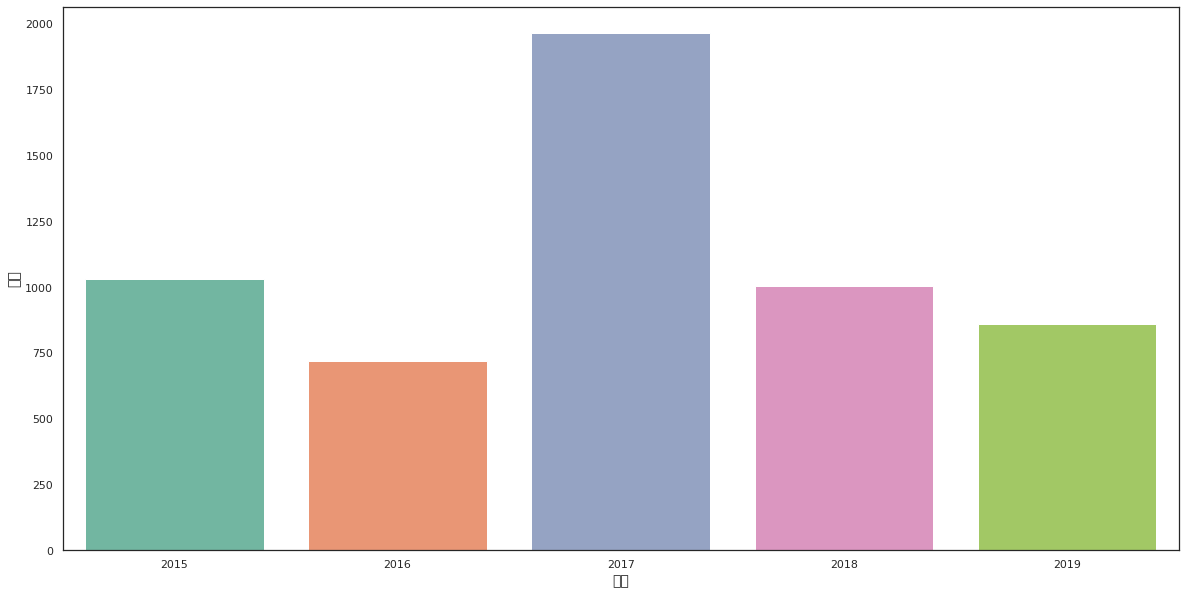

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="연도", data=df_oil, palette="Set2") #주유소 연도별 갯수
plt.xlabel('연도', fontsize=14)
plt.ylabel('개수', fontsize=14)

# 주유소는 5년간 신규등록만 약 2000개인데, 전기자동차 충전소는 000개임으로 전기 충전소가 부족해 더 지어야 함을 알게됨.
# 전기차 시대가 도래하면서 2017년 이후 전기차 보급으로 주유소 등록개수가 줄고 있음을 볼 수 있음.

#지역별 충전소 개수(지도와 바 그래프)

In [ ]:
ALL

,행정도시,시도,위치수,급속,완속
0,서울특별시,관악구,13,9,14
1,서울특별시,강남구,53,37,81
2,서울특별시,강동구,32,26,56
3,서울특별시,강북구,8,8,16
4,서울특별시,광진구,12,8,16
...,...,...,...,...,...
219,대구광역시,서구,4,6,9
220,대구광역시,수성구,41,31,60
221,대구광역시,중구,10,8,21
222,대구광역시,달성군,26,20,61


In [ ]:
set(ALL['행정도시'])

{'강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도'}

### 1. 지도

In [ ]:
# 시군구별 좌표를 구하기 힘들어서, 도별로 보기로 했으며, 좌표는 구글에 검색해서 추합함.
col = ['행정도시', '위도', '경도']
ind = [1,2,3,4,5]
con = [[0, 0, 0], [0, 0, 0],[0, 0, 0], [0, 0, 0], [0, 0, 0]]

location = pd.DataFrame(con, columns = col, index = ind)

location.loc[1] = ['서울특별시', 37.57, 126.98]
location.loc[2] = ['인천광역시', 37.40, 126.66]
location.loc[3] = ['경기도', 37.24, 127.17] #용인
location.loc[4] = ['강원도', 37.37, 128.39] #평창
location.loc[5] = ['충청남도', 36.45, 126.80] #청양
location.loc[6] = ['충청북도', 36.64, 127.48] #청주
location.loc[7] = ['전라남도', 34.80, 126.69] # 영암
location.loc[8] = ['전라북도', 35.82, 127.14] #전주
location.loc[9] = ['경상남도', 35.18, 128.10] #진주
location.loc[10] = ['경상북도', 36.56, 128.72] #안동
location.loc[11] = ['제주특별자치도', 33.32, 126.68]
location.loc[12] = ['대전광역시', 35.00, 128.72]
location.loc[13] = ['울산광역시', 35.53,129.31]
location.loc[14] = ['광주광역시', 36.34, 127.39]
location.loc[15] = ['부산광역시', 35.18, 129.08]
location.loc[16] = ['대구광역시', 35.85, 128.56]
location.loc[17] = ['세종특별자치시', 36.30, 127.16]
location

,행정도시,위도,경도
1,서울특별시,37.57,126.98
2,인천광역시,37.40,126.66
3,경기도,37.24,127.17
4,강원도,37.37,128.39
5,충청남도,36.45,126.80
6,충청북도,36.64,127.48
7,전라남도,34.80,126.69
8,전라북도,35.82,127.14
9,경상남도,35.18,128.10
10,경상북도,36.56,128.72


In [ ]:
df_all = pd.merge(ALL, location, on = "행정도시")

In [ ]:
allocation = pd.pivot_table(df_all, index = '행정도시', values = '위치수', aggfunc = 'sum')
allocation

,위치수
행정도시,
강원도,169
경기도,761
경상남도,252
경상북도,193
광주광역시,92
대구광역시,233
대전광역시,106
부산광역시,134
서울특별시,559


In [ ]:
df_final = pd.merge(allocation, location, on = "행정도시")
df_final

,행정도시,위치수,위도,경도
0,강원도,169,37.37,128.39
1,경기도,761,37.24,127.17
2,경상남도,252,35.18,128.10
3,경상북도,193,36.56,128.72
4,광주광역시,92,36.34,127.39
5,대구광역시,233,35.85,128.56
6,대전광역시,106,35.00,128.72
7,부산광역시,134,35.18,129.08
8,서울특별시,559,37.57,126.98
9,세종특별자치시,63,36.30,127.16


In [ ]:
df_final['위도'][0], df_final['경도'][0]

(37.37, 128.39)

In [ ]:
# 지도 출력을 위한 라이브러리 folium을 import 합니다.
import folium

# Map 함수를 사용하여 지도를 출력합니다.
map_osm = folium.Map(location=[37.529622, 126.984307], zoom_start=11)

In [ ]:
# 대한민국 가운데 좌표를 잡아 지도를 출력.
map_osm = folium.Map(location=[36.529622, 126],
                     zoom_start=7)

# 지역 정보를 set 함수를 사용하여 행정도시 이름만 뽑아냄.
for region in set(df_final['행정도시']):

    # 해당 지역의 데이터 개수를 count에 저장.
    count = len(df_final[df_final['행정도시'] == region])
    # 해당 지역의 데이터를 df_final에서 뽑음.
    CRS_region = df_final[df_final['행정도시'] == region]
    lat = float(CRS_region['위도'])
    lng = float(CRS_region['경도'])

    # # CircleMarker를 사용하여 지역마다 원형마커를 생성.
    folium.CircleMarker(location=[lat, lng], # 위치
                        radius=count/15 + 30,
                        fill=True,
                        fill_color='#3186cc').add_to(map_osm)
    
map_osm

In [ ]:
map_osm = folium.Map(location=[36.529622, 126], zoom_start=7)
folium.CircleMarker([df_final['위도'][0], df_final['경도'][0]],radius=df_final['위치수'][0]*0.1, fill=True, fill_color='#3186cc').add_to(map_osm)
folium.CircleMarker([df_final['위도'][1], df_final['경도'][1]],radius=df_final['위치수'][1]*0.1, fill=True, fill_color='PuRd').add_to(map_osm) # 경기
folium.CircleMarker([df_final['위도'][2], df_final['경도'][2]],radius=df_final['위치수'][2]*0.1, fill=True, fill_color='#3186cc').add_to(map_osm)
folium.CircleMarker([df_final['위도'][3], df_final['경도'][3]],radius=df_final['위치수'][3]*0.1, fill=True, fill_color='#3186cc').add_to(map_osm)
folium.CircleMarker([df_final['위도'][4], df_final['경도'][4]],radius=df_final['위치수'][4]*0.1, fill=True, fill_color='#3186cc').add_to(map_osm)
folium.CircleMarker([df_final['위도'][5], df_final['경도'][5]],radius=df_final['위치수'][5]*0.1, fill=True, fill_color='#3186cc').add_to(map_osm)
folium.CircleMarker([df_final['위도'][6], df_final['경도'][6]],radius=df_final['위치수'][6]*0.1, fill=True, fill_color='#3186cc').add_to(map_osm)
folium.CircleMarker([df_final['위도'][7], df_final['경도'][7]],radius=df_final['위치수'][7]*0.1, fill=True, fill_color='#3186cc').add_to(map_osm)
folium.CircleMarker([df_final['위도'][8], df_final['경도'][8]],radius=df_final['위치수'][8]*0.1, fill=True, fill_color='YlGnBu').add_to(map_osm) # 서울
folium.CircleMarker([df_final['위도'][9], df_final['경도'][9]],radius=df_final['위치수'][9]*0.1, fill=True, fill_color='#3186cc').add_to(map_osm)
folium.CircleMarker([df_final['위도'][10], df_final['경도'][10]],radius=df_final['위치수'][10]*0.1, fill=True, fill_color='#3186cc').add_to(map_osm)
folium.CircleMarker([df_final['위도'][11], df_final['경도'][11]],radius=df_final['위치수'][11]*0.1, fill=True, fill_color='#3186cc').add_to(map_osm)
folium.CircleMarker([df_final['위도'][12], df_final['경도'][12]],radius=df_final['위치수'][12]*0.1, fill=True, fill_color='#3186cc').add_to(map_osm)
folium.CircleMarker([df_final['위도'][13], df_final['경도'][13]],radius=df_final['위치수'][13]*0.1, fill=True, fill_color='#3186cc').add_to(map_osm)
folium.CircleMarker([df_final['위도'][14], df_final['경도'][14]],radius=df_final['위치수'][14]*0.1, fill=True, fill_color='#3186cc').add_to(map_osm)
folium.CircleMarker([df_final['위도'][15], df_final['경도'][15]],radius=df_final['위치수'][15]*0.1, fill=True, fill_color='#3186cc').add_to(map_osm)
folium.CircleMarker([df_final['위도'][16], df_final['경도'][16]],radius=df_final['위치수'][16]*0.1, fill=True, fill_color='#3186cc').add_to(map_osm)
map_osm
# 대부분의 충전소가 수도권에 모여있음을 알 수 있음.

### 2. 바그래프

In [ ]:
#급속과 완속의 콜론도 있는 df
col = ['행정도시', '급속', '완속', '충전기합계']
ind = [1,2,3,4,5]
con = [[0, 0, 0, 0], [0, 0, 0, 0],[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

speed = pd.DataFrame(con, columns = col, index = ind)

speed

,행정도시,급속,완속,충전기합계
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0


In [ ]:
speed.loc[0] = ['서울특별시', new['급속'].sum(), new['완속'].sum(), new['급속'].sum()+new['완속'].sum()]
speed.loc[1] = ['인천광역시', new1['급속'].sum(), new1['완속'].sum(), new1['급속'].sum()+new1['완속'].sum()]
speed.loc[2] = ['경기도', new2['급속'].sum(), new2['완속'].sum(), new2['급속'].sum()+new2['완속'].sum()]
speed.loc[3] = ['강원도', new3['급속'].sum(), new3['완속'].sum(), new3['급속'].sum()+new3['완속'].sum()]
speed.loc[4] = ['충청남도', new4['급속'].sum(), new4['완속'].sum(), new4['급속'].sum()+new4['완속'].sum()]
speed.loc[5] = ['충청북도', new5['급속'].sum(), new5['완속'].sum(), new5['급속'].sum()+new5['완속'].sum()]
speed.loc[6] = ['전라남도', new6['급속'].sum(), new6['완속'].sum(), new6['급속'].sum()+new6['완속'].sum()]
speed.loc[7] = ['전라북도', new7['급속'].sum(), new7['완속'].sum(), new7['급속'].sum()+new7['완속'].sum()]
speed.loc[8] = ['경상남도', new8['급속'].sum(), new8['완속'].sum(), new8['급속'].sum()+new8['완속'].sum()]
speed.loc[9] = ['경상북도', new9['급속'].sum(), new9['완속'].sum(), new9['급속'].sum()+new9['완속'].sum()]
speed.loc[10] = ['제주특별자치도', new10['급속'].sum(), new10['완속'].sum(), new10['급속'].sum()+new10['완속'].sum()]
speed.loc[11] = ['대전광역시', new11['급속'].sum(), new11['완속'].sum(), new11['급속'].sum()+new11['완속'].sum()]
speed.loc[12] = ['울산광역시', new12['급속'].sum(), new12['완속'].sum(), new12['급속'].sum()+new12['완속'].sum()]
speed.loc[13] = ['광주광역시', new13['급속'].sum(), new13['완속'].sum(), new13['급속'].sum()+new13['완속'].sum()]
speed.loc[14] = ['부산광역시', new14['급속'].sum(), new14['완속'].sum(), new14['급속'].sum()+new14['완속'].sum()]
speed.loc[15] = ['대구광역시', new15['급속'].sum(), new15['완속'].sum(), new15['급속'].sum()+new15['완속'].sum()]
speed.loc[16] = ['세종특별자치시', new16['급속'].sum(), new16['완속'].sum(), new16['급속'].sum()+new16['완속'].sum()]

speed

,행정도시,급속,완속,충전기합계
1,인천광역시,136,310,446
2,경기도,667,1482,2149
3,강원도,138,184,322
4,충청남도,120,158,278
5,충청북도,146,253,399
0,서울특별시,453,922,1375
6,전라남도,192,215,407
7,전라북도,129,212,341
8,경상남도,228,368,596
9,경상북도,188,238,426


In [ ]:
speed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 1 to 16
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정도시    17 non-null     object
 1   급속      17 non-null     int64 
 2   완속      17 non-null     int64 
 3   충전기합계   17 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 680.0+ bytes


In [ ]:
speed['완속'].sum()

5670

In [ ]:
charger = pd.pivot_table(speed, index = '행정도시', values = '충전기합계', aggfunc = 'sum') # 행정도시를 기준으로 충전소개수보기
charger

,충전기합계
행정도시,
강원도,322
경기도,2149
경상남도,596
경상북도,426
광주광역시,203
대구광역시,616
대전광역시,299
부산광역시,336
서울특별시,1375


In [ ]:
import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_

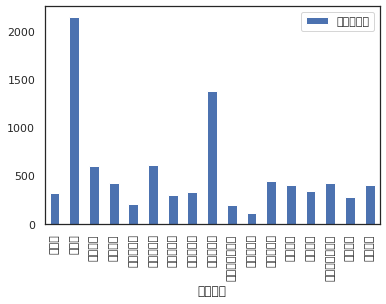

In [ ]:
charger.plot(kind='bar')
plt.show()
#경기도와 서울에 몰려있음을 볼 수 있음.

In [ ]:
fastc= pd.pivot_table(speed, index = '행정도시', values = '급속', aggfunc = 'sum') 

In [ ]:
slowc = pd.pivot_table(speed, index = '행정도시', values = '완속', aggfunc = 'sum') # 주유소를 1로 치환 후, 합계를 연도별로 표시.

In [ ]:
bothc = pd.merge(fastc , slowc, on = '행정도시')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_

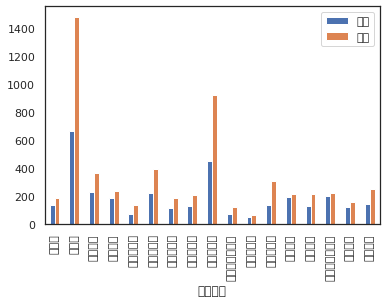

In [ ]:
bothc.plot(kind='bar')
plt.show()
#모든 도시에서 급속보다 완속이 많음을 알 수 있음. 완속은 충전시간이 느리기에 급속이 완속보다 많이 필요함. 앞으로는 급속 충전기 설치를 우선해야 할 것.

## 전기차 대수

In [ ]:
car = pd.read_csv("한국전력공사_지역별 전기차 현황정보_20201008.csv")
car.shape

(3, 19)

In [ ]:
car.head()

,기준일,부산,대구,대전,광주,경기,강원,경북,경남,충북,충남,전북,전남,세종,서울,인천,울산,제주,합계
0,2018-12-31,1567,6605,1334,1447,6383,1377,2001,2107,1199,1127,997,1974,394,9564,1284,847,15549,55756.0
1,2019-12-31,3216,11313,2555,2464,11750,2445,4051,3626,2412,2841,1841,3326,903,14952,2598,1447,18178,89918.0
2,2020-08-31,4320,12468,3338,3046,17197,3091,5400,5003,3319,4252,2906,4576,1076,20997,4204,2142,20699,NaN


In [ ]:
car

,기준일,부산,대구,대전,광주,경기,강원,경북,경남,충북,충남,전북,전남,세종,서울,인천,울산,제주,합계
0,2018-12-31,1567,6605,1334,1447,6383,1377,2001,2107,1199,1127,997,1974,394,9564,1284,847,15549,55756.0
1,2019-12-31,3216,11313,2555,2464,11750,2445,4051,3626,2412,2841,1841,3326,903,14952,2598,1447,18178,89918.0
2,2020-08-31,4320,12468,3338,3046,17197,3091,5400,5003,3319,4252,2906,4576,1076,20997,4204,2142,20699,NaN


In [ ]:
car.columns[1:18]

Index(['부산', '대구', '대전', '광주', '경기', '강원', '경북', '경남', '충북', '충남', '전북', '전남',
       '세종', '서울', '인천', '울산', '제주'],
      dtype='object')

In [ ]:
car.loc[2][1:18]

부산     4320
대구    12468
대전     3338
광주     3046
경기    17197
강원     3091
경북     5400
경남     5003
충북     3319
충남     4252
전북     2906
전남     4576
세종     1076
서울    20997
인천     4204
울산     2142
제주    20699
Name: 2, dtype: object

In [ ]:
car.loc[2][1:18].sum()

118034

In [ ]:
car.loc[2, '합계'] = car.loc[2][1:18].sum()
car
# 연도가 지날 때마다 이만큼 등록이 되어있다로 보는 게 맞는 듯. 누적으로!

,기준일,부산,대구,대전,광주,경기,강원,경북,경남,충북,충남,전북,전남,세종,서울,인천,울산,제주,합계
0,2018-12-31,1567,6605,1334,1447,6383,1377,2001,2107,1199,1127,997,1974,394,9564,1284,847,15549,55756.0
1,2019-12-31,3216,11313,2555,2464,11750,2445,4051,3626,2412,2841,1841,3326,903,14952,2598,1447,18178,89918.0
2,2020-08-31,4320,12468,3338,3046,17197,3091,5400,5003,3319,4252,2906,4576,1076,20997,4204,2142,20699,118034.0


In [ ]:
car.columns = ['기준일', '부산광역시', '대구광역시', '대전광역시','광주광역시', '경기도', '강원도', '경상북도', '경상남도', '충청북도', '충청남도', '전라북도', '전라남도', '세종특별자치시', '서울특별시', '인천광역시', '울산광역시', '제주특별자치도', '합계']
car

,기준일,부산광역시,대구광역시,대전광역시,광주광역시,경기도,강원도,경상북도,경상남도,충청북도,충청남도,전라북도,전라남도,세종특별자치시,서울특별시,인천광역시,울산광역시,제주특별자치도,합계
0,2018-12-31,1567,6605,1334,1447,6383,1377,2001,2107,1199,1127,997,1974,394,9564,1284,847,15549,55756.0
1,2019-12-31,3216,11313,2555,2464,11750,2445,4051,3626,2412,2841,1841,3326,903,14952,2598,1447,18178,89918.0
2,2020-08-31,4320,12468,3338,3046,17197,3091,5400,5003,3319,4252,2906,4576,1076,20997,4204,2142,20699,118034.0


In [ ]:
car1= car.set_index('기준일')
car1

,부산광역시,대구광역시,대전광역시,광주광역시,경기도,강원도,경상북도,경상남도,충청북도,충청남도,전라북도,전라남도,세종특별자치시,서울특별시,인천광역시,울산광역시,제주특별자치도,합계
기준일,,,,,,,,,,,,,,,,,,
2018-12-31,1567,6605,1334,1447,6383,1377,2001,2107,1199,1127,997,1974,394,9564,1284,847,15549,55756.0
2019-12-31,3216,11313,2555,2464,11750,2445,4051,3626,2412,2841,1841,3326,903,14952,2598,1447,18178,89918.0
2020-08-31,4320,12468,3338,3046,17197,3091,5400,5003,3319,4252,2906,4576,1076,20997,4204,2142,20699,118034.0


In [ ]:
trans_car = car1.transpose()
trans_car

기준일,2018-12-31,2019-12-31,2020-08-31
부산광역시,1567.0,3216.0,4320.0
대구광역시,6605.0,11313.0,12468.0
대전광역시,1334.0,2555.0,3338.0
광주광역시,1447.0,2464.0,3046.0
경기도,6383.0,11750.0,17197.0
강원도,1377.0,2445.0,3091.0
경상북도,2001.0,4051.0,5400.0
경상남도,2107.0,3626.0,5003.0
충청북도,1199.0,2412.0,3319.0
충청남도,1127.0,2841.0,4252.0


In [ ]:
trans_car = trans_car.drop('합계')

In [ ]:
trans_car

기준일,2018-12-31,2019-12-31,2020-08-31
부산광역시,1567.0,3216.0,4320.0
대구광역시,6605.0,11313.0,12468.0
대전광역시,1334.0,2555.0,3338.0
광주광역시,1447.0,2464.0,3046.0
경기도,6383.0,11750.0,17197.0
강원도,1377.0,2445.0,3091.0
경상북도,2001.0,4051.0,5400.0
경상남도,2107.0,3626.0,5003.0
충청북도,1199.0,2412.0,3319.0
충청남도,1127.0,2841.0,4252.0


In [ ]:
trans_car['행정도시'] = ['부산광역시', '대구광역시', '대전광역시','광주광역시', '경기도', '강원도', '경상북도', '경상남도', '충청북도', '충청남도', '전라북도', '전라남도', '세종특별자치시', '서울특별시', '인천광역시', '울산광역시', '제주특별자치도']
trans_car

기준일,2018-12-31,2019-12-31,2020-08-31,행정도시
부산광역시,1567.0,3216.0,4320.0,부산광역시
대구광역시,6605.0,11313.0,12468.0,대구광역시
대전광역시,1334.0,2555.0,3338.0,대전광역시
광주광역시,1447.0,2464.0,3046.0,광주광역시
경기도,6383.0,11750.0,17197.0,경기도
강원도,1377.0,2445.0,3091.0,강원도
경상북도,2001.0,4051.0,5400.0,경상북도
경상남도,2107.0,3626.0,5003.0,경상남도
충청북도,1199.0,2412.0,3319.0,충청북도
충청남도,1127.0,2841.0,4252.0,충청남도


In [ ]:
trans_car.set_index('행정도시')

기준일,2018-12-31,2019-12-31,2020-08-31
행정도시,,,
부산광역시,1567.0,3216.0,4320.0
대구광역시,6605.0,11313.0,12468.0
대전광역시,1334.0,2555.0,3338.0
광주광역시,1447.0,2464.0,3046.0
경기도,6383.0,11750.0,17197.0
강원도,1377.0,2445.0,3091.0
경상북도,2001.0,4051.0,5400.0
경상남도,2107.0,3626.0,5003.0
충청북도,1199.0,2412.0,3319.0


In [ ]:
Aug= pd.pivot_table(trans_car, index = '행정도시', values = '2020-08-31', aggfunc = 'sum') 
Aug

기준일,2020-08-31
행정도시,
강원도,3091.0
경기도,17197.0
경상남도,5003.0
경상북도,5400.0
광주광역시,3046.0
대구광역시,12468.0
대전광역시,3338.0
부산광역시,4320.0
서울특별시,20997.0


In [ ]:
Aug_charger = pd.merge(Aug, charger, on = '행정도시')
Aug_charger

,2020-08-31,충전기합계
행정도시,,
강원도,3091.0,322
경기도,17197.0,2149
경상남도,5003.0,596
경상북도,5400.0,426
광주광역시,3046.0,203
대구광역시,12468.0,616
대전광역시,3338.0,299
부산광역시,4320.0,336
서울특별시,20997.0,1375


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_

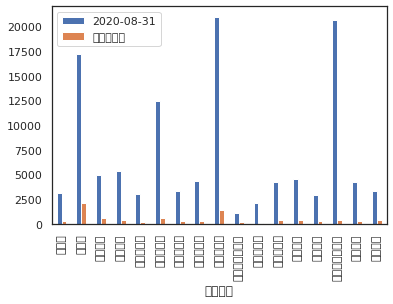

In [ ]:
Aug_charger.plot(kind='bar')
plt.show()
# 2020년 신규등록 차 대수만 가지고도 현재 충전기 개수와 비교해보면 터무니없이 충전기가 차보다 부족함을 볼 수 있음.

In [ ]:
Aug_charger['비율'] = Aug_charger['충전기합계']/Aug_charger['2020-08-31']*100
Aug_charger

,2020-08-31,충전기합계,비율
행정도시,,,
강원도,3091.0,322,10.417341
경기도,17197.0,2149,12.496366
경상남도,5003.0,596,11.912852
경상북도,5400.0,426,7.888889
광주광역시,3046.0,203,6.664478
대구광역시,12468.0,616,4.940648
대전광역시,3338.0,299,8.957460
부산광역시,4320.0,336,7.777778
서울특별시,20997.0,1375,6.548555


In [ ]:
ratio = pd.pivot_table(Aug_charger, index = '행정도시', values = '비율', aggfunc = 'sum') 
ratio

,비율
행정도시,
강원도,10.417341
경기도,12.496366
경상남도,11.912852
경상북도,7.888889
광주광역시,6.664478
대구광역시,4.940648
대전광역시,8.957460
부산광역시,7.777778
서울특별시,6.548555


(0.0, 16.0, 0.0, 100.0)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_

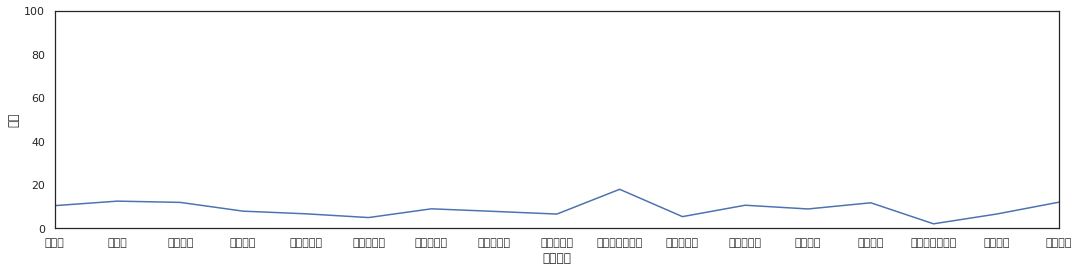

In [ ]:
plt.rcParams["figure.figsize"] = (18,4)
sns.lineplot(data=ratio, x='행정도시', y="비율")
plt.axis([0, 16, 0, 100])

No handles with labels found to put in legend.


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_

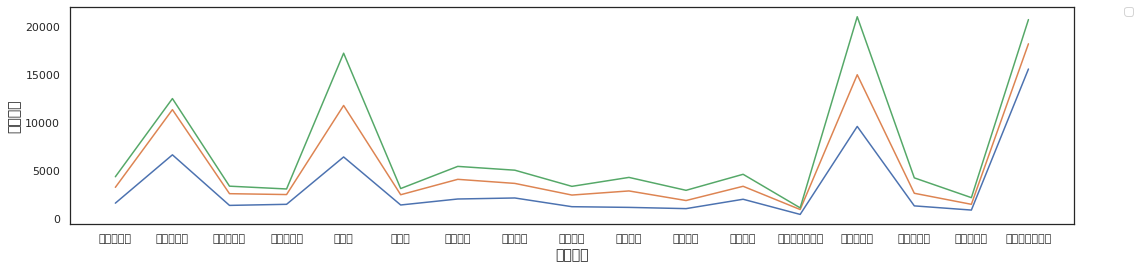

In [ ]:
sns.lineplot(data=trans_car, x='행정도시', y="2018-12-31")
sns.lineplot(data=trans_car, x='행정도시', y="2019-12-31")
sns.lineplot(data=trans_car, x='행정도시', y="2020-08-31")

plt.ylabel('차량대수', fontsize=14)
plt.xlabel('행정도시', fontsize=14)

plt.rcParams["figure.figsize"] = (20,4)
# 밑에서 위로 2018, 2019, 2020.
# 전기차 대수가 연도가 지날 수록 수가 많아짐을 알 수 있음.

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)